# DRINKING PREDICTION WITH LINEAR REGRESSION

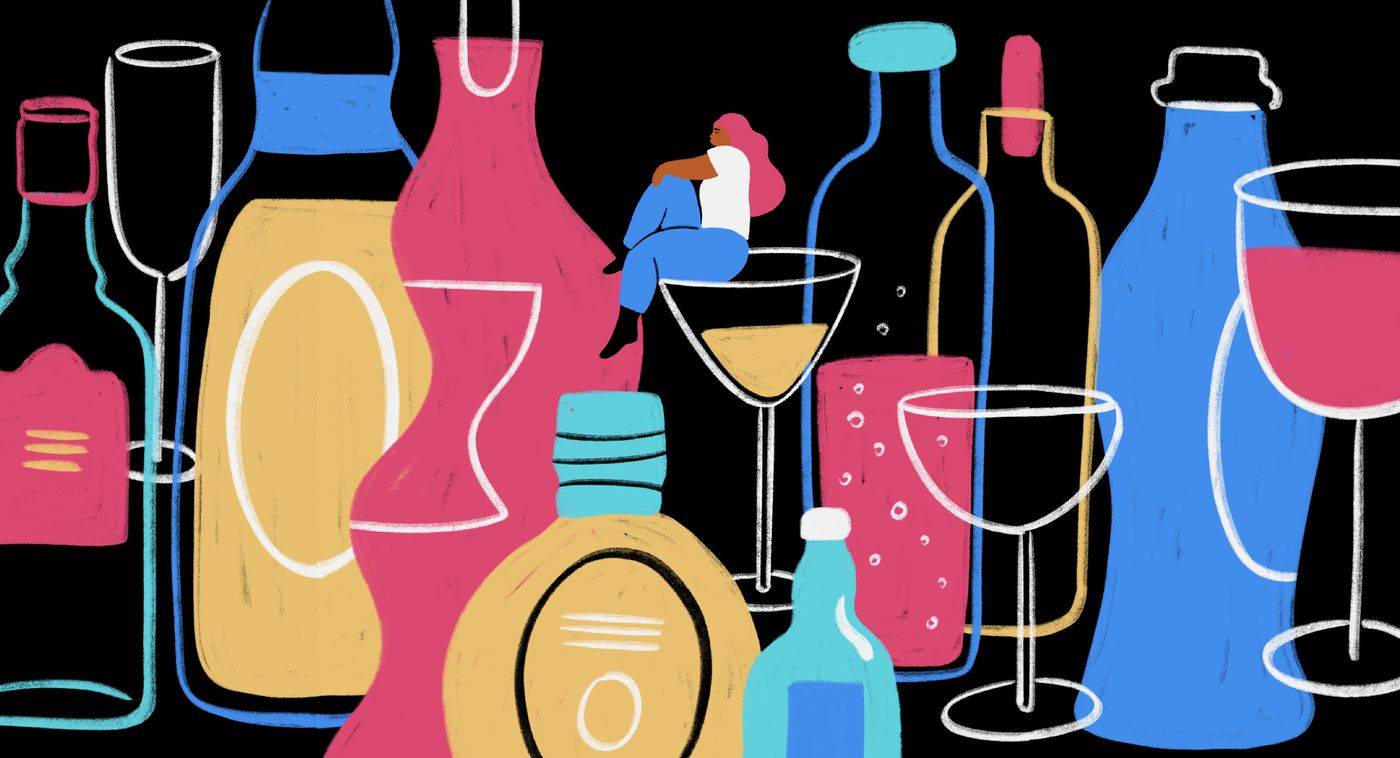

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [2]:
data =pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [3]:
data

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0             1.0         1.0  120.0  ...      126.0          92.0   
1             1.0         1.0  130.0  ...      148.0         121.0   
2             1.0         1.0  120.0  ...       74.0         104.0   
3             1.0         1.0  145.0  ...      104.0         106.0   
4             1.0         1.0  138.0  ...      117.0         104.0   
...           ...         ...    ...  ...        ...           ...   
991341        1.0         1.0  114.0  ...      125.0         132.0   
991342        1.0         1.0  119.0  ...       84.0          45.0   
991343        1.0         1.0  110.0  ...       77.0         157.0   
991344        1.0         1.0  119.0  ...       73.0          53.0   
991345        1.0         1.0  133.0  ...      153.0         163.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0             17.1            1.0               1.0      21.0      35.0   
1             15.8            1.0               0.9      20.0      36.0   
2             15.8            1.0               0.9      47.0      32.0   
3             17.6            1.0               1.1      29.0      34.0   
4             13.8            1.0               0.8      19.0      12.0   
...            ...            ...               ...       ...       ...   
991341        15.0            1.0               1.0      26.0      36.0   
991342        15.8            1.0               1.1      14.0      17.0   
991343        14.3            1.0               0.8      30.0      27.0   
991344        14.5            1.0               0.8      21.0      14.0   
991345        15.8            1.0               0.9      24.0      43.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
0            40.0               1.0       Y  
1            27.0               3.0       N  
2            68.0               1.0       N  
3            18.0               1.0       N  
4            25.0               1.0       N  
...           ...               ...     ...  
991341       27.0               1.0       N  
991342       15.0               1.0       N  
991343       17.0               3.0       Y  
991344       17.0               1.0       N  
991345       36.0               3.0       Y  

[991346 rows x 24 columns]

In [4]:
data.head(10)

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    Male   35     170      75       90.0         1.0          1.0        1.0   
1    Male   30     180      80       89.0         0.9          1.2        1.0   
2    Male   40     165      75       91.0         1.2          1.5        1.0   
3    Male   50     175      80       91.0         1.5          1.2        1.0   
4    Male   50     165      60       80.0         1.0          1.2        1.0   
5    Male   50     165      55       75.0         1.2          1.5        1.0   
6  Female   45     150      55       69.0         0.5          0.4        1.0   
7    Male   35     175      65       84.2         1.2          1.0        1.0   
8    Male   55     170      75       84.0         1.2          0.9        1.0   
9    Male   40     175      75       82.0         1.5          1.5        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   
5         1.0  142.0  ...       95.0         232.0        13.8            3.0   
6         1.0  101.0  ...      115.0          75.0        12.3            1.0   
7         1.0  132.0  ...      107.0         101.0        14.4            1.0   
8         1.0  145.0  ...      141.0         100.0        15.1            1.0   
9         1.0  132.0  ...      118.0          83.0        13.9            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       Y  
1               0.9      20.0      36.0       27.0               3.0       N  
2               0.9      47.0      32.0       68.0               1.0       N  
3               1.1      29.0      34.0       18.0               1.0       N  
4               0.8      19.0      12.0       25.0               1.0       N  
5               0.8      29.0      40.0       37.0               3.0       Y  
6               0.8      19.0      12.0       12.0               1.0       N  
7               0.8      18.0      18.0       35.0               3.0       Y  
8               0.8      32.0      23.0       26.0               1.0       Y  
9               0.9      21.0      38.0       16.0               2.0       Y  

[10 rows x 24 columns]

In [5]:
data.tail(10)

sex  age  height  weight  waistline  sight_left  sight_right  \
991336    Male   80     170      60       74.0         1.0          0.9   
991337  Female   35     165      70       81.0         1.0          1.0   
991338    Male   20     175      65       74.5         1.0          1.5   
991339    Male   70     165      60       78.0         0.9          0.8   
991340  Female   50     150      50       72.6         1.0          1.0   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
991336        1.0         1.0  139.0  ...       84.0          57.0   
991337        1.0         1.0  113.0  ...       92.0          88.0   
991338        1.0         1.0  105.0  ...      120.0          92.0   
991339        1.0         1.0  137.0  ...       89.0         105.0   
991340        1.0         1.0  116.0  ...      105.0         125.0   
991341        1.0         1.0  114.0  ...      125.0         132.0   
991342        1.0         1.0  119.0  ...       84.0          45.0   
991343        1.0         1.0  110.0  ...       77.0         157.0   
991344        1.0         1.0  119.0  ...       73.0          53.0   
991345        1.0         1.0  133.0  ...      153.0         163.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
991336        12.0            1.0               1.2      18.0      11.0   
991337        13.3            1.0               0.7      20.0      17.0   
991338        15.4            1.0               0.8      25.0      26.0   
991339        16.1            1.0               1.0      23.0      13.0   
991340        15.2            1.0               0.8      28.0      26.0   
991341        15.0            1.0               1.0      26.0      36.0   
991342        15.8            1.0               1.1      14.0      17.0   
991343        14.3            1.0               0.8      30.0      27.0   
991344        14.5            1.0               0.8      21.0      14.0   
991345        15.8            1.0               0.9      24.0      43.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
991336       15.0               2.0       Y  
991337       12.0               1.0       N  
991338       50.0               2.0       Y  
991339       32.0               1.0       Y  
991340       29.0               1.0       N  
991341       27.0               1.0       N  
991342       15.0               1.0       N  
991343       17.0               3.0       Y  
991344       17.0               1.0       N  
991345       36.0               3.0       Y  

[10 rows x 24 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [7]:
data.shape

(991346, 24)

In [8]:
data.describe().T

count        mean         std    min    25%    50%  \
age               991346.0   47.614491   14.181339   20.0   35.0   45.0   
height            991346.0  162.240625    9.282957  130.0  155.0  160.0   
weight            991346.0   63.284050   12.514241   25.0   55.0   60.0   
waistline         991346.0   81.233358   11.850323    8.0   74.1   81.0   
sight_left        991346.0    0.980834    0.605949    0.1    0.7    1.0   
sight_right       991346.0    0.978429    0.604774    0.1    0.7    1.0   
hear_left         991346.0    1.031495    0.174650    1.0    1.0    1.0   
hear_right        991346.0    1.030476    0.171892    1.0    1.0    1.0   
SBP               991346.0  122.432498   14.543148   67.0  112.0  120.0   
DBP               991346.0   76.052627    9.889365   32.0   70.0   76.0   
BLDS              991346.0  100.424447   24.179960   25.0   88.0   96.0   
tot_chole         991346.0  195.557020   38.660155   30.0  169.0  193.0   
HDL_chole         991346.0   56.936800   17.238479    1.0   46.0   55.0   
LDL_chole         991346.0  113.037692   35.842812    1.0   89.0  111.0   
triglyceride      991346.0  132.141751  102.196985    1.0   73.0  106.0   
hemoglobin        991346.0   14.229824    1.584929    1.0   13.2   14.3   
urine_protein     991346.0    1.094224    0.437724    1.0    1.0    1.0   
serum_creatinine  991346.0    0.860467    0.480530    0.1    0.7    0.8   
SGOT_AST          991346.0   25.989308   23.493386    1.0   19.0   23.0   
SGOT_ALT          991346.0   25.755051   26.308599    1.0   15.0   20.0   
gamma_GTP         991346.0   37.136347   50.424153    1.0   16.0   23.0   
SMK_stat_type_cd  991346.0    1.608122    0.818507    1.0    1.0    1.0   

                    75%     max  
age                60.0    85.0  
height            170.0   190.0  
weight             70.0   140.0  
waistline          87.8   999.0  
sight_left          1.2     9.9  
sight_right         1.2     9.9  
hear_left           1.0     2.0  
hear_right          1.0     2.0  
SBP               131.0   273.0  
DBP                82.0   185.0  
BLDS              105.0   852.0  
tot_chole         219.0  2344.0  
HDL_chole          66.0  8110.0  
LDL_chole         135.0  5119.0  
triglyceride      159.0  9490.0  
hemoglobin         15.4    25.0  
urine_protein       1.0     6.0  
serum_creatinine    1.0    98.0  
SGOT_AST           28.0  9999.0  
SGOT_ALT           29.0  7210.0  
gamma_GTP          39.0   999.0  
SMK_stat_type_cd    2.0     3.0

In [9]:
data.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [10]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [11]:
data.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

In [12]:
#checking for duplicates

duplicates = data[data.duplicated()]
duplicates

sex  age  height  weight  waistline  sight_left  sight_right  \
159911  Female   40     170      85       88.0         0.9          0.9   
175152    Male   65     170      75      101.1         0.6          0.7   
246305  Female   50     155      70       90.8         1.0          1.0   
280830    Male   45     170      75       86.4         1.2          0.7   
284528  Female   65     150      55       86.0         0.9          0.9   
290463  Female   20     160      50       70.0         1.0          1.0   
335747    Male   50     180      95      101.0         1.5          1.5   
429596    Male   75     160      60       83.0         1.2          0.7   
453451    Male   35     170      65       85.0         0.9          1.2   
471596  Female   45     165      65       82.0         1.0          1.0   
479756    Male   50     165      65       77.0         0.8          1.0   
555137    Male   30     165      95      106.3         0.7          1.0   
558263  Female   65     145      50       76.0         1.0          0.9   
568854    Male   50     170      65       87.8         1.5          1.5   
668305  Female   55     140      50       78.0         0.9          1.2   
671067    Male   60     165      70       84.0         0.4          0.1   
686628  Female   65     155      55       69.2         0.7          0.7   
727207    Male   40     170      70       82.0         0.8          1.5   
746077    Male   25     180      70       76.0         1.0          1.2   
779854    Male   55     170      60       83.0         1.5          1.5   
804343    Male   40     175      80       88.9         1.2          1.2   
834790  Female   30     150      45       60.0         1.2          0.9   
872213    Male   35     170     105      115.0         0.3          0.2   
953247    Male   35     180      85       91.4         1.2          1.5   
973015    Male   35     170      95       99.0         1.0          1.2   
982525  Female   40     160      55       67.0         2.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
159911        1.0         1.0  120.0  ...      121.0         115.0   
175152        1.0         1.0  130.0  ...      109.0         140.0   
246305        1.0         1.0  150.0  ...      150.0         183.0   
280830        1.0         1.0  150.0  ...      122.0         499.0   
284528        1.0         1.0  120.0  ...      139.0         136.0   
290463        1.0         1.0  106.0  ...       98.0          56.0   
335747        1.0         2.0  177.0  ...      120.0         105.0   
429596        1.0         1.0  105.0  ...      150.0          82.0   
453451        1.0         1.0  130.0  ...       80.0         126.0   
471596        1.0         1.0  120.0  ...      103.0          53.0   
479756        1.0         1.0  115.0  ...      154.0          71.0   
555137        1.0         1.0  122.0  ...      140.0         313.0   
558263        1.0         1.0  154.0  ...      160.0         212.0   
568854        1.0         1.0  127.0  ...      102.0         113.0   
668305        1.0         1.0  134.0  ...      121.0         456.0   
671067        1.0         1.0  130.0  ...      123.0         113.0   
686628        1.0         1.0  130.0  ...      185.0         283.0   
727207        1.0         1.0  120.0  ...      131.0         106.0   
746077        1.0         1.0  122.0  ...       57.0          92.0   
779854        1.0         1.0  128.0  ...      126.0         294.0   
804343        1.0         1.0  138.0  ...      146.0         635.0   
834790        1.0         1.0  100.0  ...       90.0          93.0   
872213        1.0         1.0  130.0  ...      120.0         200.0   
953247        1.0         1.0  120.0  ...       83.0         461.0   
973015        1.0         1.0  122.0  ...      168.0         117.0   
982525        1.0         1.0  120.0  ...      102.0          87.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
159911        10.4 

In [13]:
duplicates.shape

(26, 24)

In [14]:
# Remove duplicates and keep the first occurrence
data= data.drop_duplicates(keep='first')

In [15]:
data[data.duplicated()].shape

(0, 24)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  object 
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   weight            991320 non-null  int64  
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  float64
 8   hear_right        991320 non-null  float64
 9   SBP               991320 non-null  float64
 10  DBP               991320 non-null  float64
 11  BLDS              991320 non-null  float64
 12  tot_chole         991320 non-null  float64
 13  HDL_chole         991320 non-null  float64
 14  LDL_chole         991320 non-null  float64
 15  triglyceride      991320 non-null  float64
 16  hemoglobin        99

In [17]:
data.describe()

age         height         weight      waistline  \
count  991320.000000  991320.000000  991320.000000  991320.000000   
mean       47.614529     162.240563      63.283884      81.233255   
std        14.181346       9.282922      12.514101      11.850296   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991320.000000  991320.000000  991320.000000  991320.000000   
mean        0.980833       0.978428       1.031495       1.030476   
std         0.605954       0.604779       0.174652       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.700000       0.700000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.200000       1.200000       1.000000       1.000000   
max         9.900000       9.900000       2.000000       2.000000   

                 SBP            DBP  ...      HDL_chole      LDL_chole  \
count  991320.000000  991320.000000  ...  991320.000000  991320.000000   
mean      122.432360      76.052549  ...      56.936984     113.037429   
std        14.543083       9.889334  ...      17.238578      35.842938   
min        67.000000      32.000000  ...       1.000000       1.000000   
25%       112.000000      70.000000  ...      46.000000      89.000000   
50%       120.000000      76.000000  ...      55.000000     111.000000   
75%       131.000000      82.000000  ...      66.000000     135.000000   
max       273.000000     185.000000  ...    8110.000000    5119.000000   

        triglyceride     hemoglobin  urine_protein  serum_creatinine  \
count  991320.000000  991320.000000  991320.000000     991320.000000   
mean      132.140030      14.229810       1.094221          0.860467   
std       102.194762       1.584924       0.437719          0.480536   
min         1.000000       1.000000       1.000000          0.100000   
25%        73.000000      13.200000       1.000000          0.700000   
50%       106.000000      14.300000       1.000000          0.800000   
75%       159.000000      15.400000       1.000000          1.000000   
max      9490.000000      25.000000       6.000000         98.000000   

            SGOT_AST       SGOT_ALT      gamma_GTP  SMK_stat_type_cd  
count  991320.000000  991320.000000  991320.000000     991320.000000  
mean       25.989424      25.755148      37.136152          1.608112  
std        23.493668      26.308910      50.423811          0.818504  
min         1.000000       1.000000       1.000000          1.000000  
25%        19.000000      15.000000      16.000000          1.000000  
50%        23.000000      20.000000      23.000000          1.000000  
75%        28.000000      29.000000      39.000000          2.000000  
max      9999.000000    7210.000000     999.000000          3.000000  

[8 rows x 22 columns]

In [18]:
def bmi(row):
    weight = row["weight"]
    height = row["height"]
    return weight / (height ** 2)

def blood_pressure_ratio(row):
    sbp = row["SBP"]
    dbp = row["DBP"]
    return sbp / dbp

def hdl_cholestorol_ratio(row):
    hdl_chole = row["HDL_chole"]
    total_chole = row["tot_chole"]
    return hdl_chole / total_chole

def ldl_cholestorol_ratio(row):
    ldl_chole = row["LDL_chole"]
    total_chole = row["tot_chole"]
    return ldl_chole / total_chole

In [19]:
data["bmi"] = data.apply(bmi, axis=1)
data["BP_ratio"] = data.apply(blood_pressure_ratio, axis=1)
data["HDL_ratio"] = data.apply(hdl_cholestorol_ratio, axis=1)
data["LDL_ratio"] = data.apply(ldl_cholestorol_ratio, axis=1)

C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\4129545581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["bmi"] = data.apply(bmi, axis=1)
C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\4129545581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["BP_ratio"] = data.apply(blood_pressure_ratio, axis=1)
C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\4129545581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [20]:
data

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  serum_creatinine  SGOT_AST  \
0             1.0         1.0  120.0  ...               1.0      21.0   
1             1.0         1.0  130.0  ...               0.9      20.0   
2             1.0         1.0  120.0  ...               0.9      47.0   
3             1.0         1.0  145.0  ...               1.1      29.0   
4             1.0         1.0  138.0  ...               0.8      19.0   
...           ...         ...    ...  ...               ...       ...   
991341        1.0         1.0  114.0  ...               1.0      26.0   
991342        1.0         1.0  119.0  ...               1.1      14.0   
991343        1.0         1.0  110.0  ...               0.8      30.0   
991344        1.0         1.0  119.0  ...               0.8      21.0   
991345        1.0         1.0  133.0  ...               0.9      24.0   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN       bmi  BP_ratio  \
0           35.0       40.0               1.0       Y  0.002595  1.500000   
1           36.0       27.0               3.0       N  0.002469  1.585366   
2           32.0       68.0               1.0       N  0.002755  1.714286   
3           34.0       18.0               1.0       N  0.002612  1.666667   
4           12.0       25.0               1.0       N  0.002204  1.682927   
...          ...        ...               ...     ...       ...       ...   
991341      36.0       27.0               1.0       N  0.002612  1.425000   
991342      17.0       15.0               1.0       N  0.002595  1.433735   
991343      27.0       17.0               3.0       Y  0.002081  1.571429   
991344      14.0       17.0               1.0       N  0.001959  1.608108   
991345      43.0       36.0               3.0       Y  0.002734  1.683544   

        HDL_ratio  LDL_ratio  
0        0.248705   0.652850  
1        0.241228   0.649123  
2        0.301471   0.544118  
3        0.378109   0.517413  
4        0.306533   0.587940  
...           ...        ...  
991341   0.232323   0.631313  
991342   0.300752   0.631579  
991343   0.468293   0.375610  
991344   0.311475   0.598361  
991345   0.173333   0.680000  

[991320 rows x 28 columns]

In [21]:

data['SGOT_ALT']

0         35.0
1         36.0
2         32.0
3         34.0
4         12.0
          ... 
991341    36.0
991342    17.0
991343    27.0
991344    14.0
991345    43.0
Name: SGOT_ALT, Length: 991320, dtype: float64

In [22]:
data['SMK_stat_type_cd'].max()


3.0

In [23]:
data['SMK_stat_type_cd'].min()

1.0

In [24]:
def classify_eyesight(val):
    if val > 1: # > 20/20 eyesight
        return "Good"
    elif val > 0.5: # > 20/40 eyesight
        return "Average"
    elif val > 0.25: # > 20/80 eyesight
        return "Poor"
    else:
        return "Very Poor"
    
def classify_blood_pressure(row):
    sbp = row["SBP"]
    dbp = row["DBP"]
    if sbp < 120 and dbp < 80:
        return "Normal"
    elif sbp < 130 and dbp < 80:
        return "Elevated"
    elif sbp < 140 and dbp < 90:
        return "Hypertension Stage 1"
    elif sbp < 180 and dbp < 120:
        return "Hypertension Stage 2"
    else:
        return "Hypertensive Crisis"
    
def classify_blood_glucose(row):
    blood_glucose = row["BLDS"]
    if blood_glucose < 70:
        return "hypoglycemia"
    elif blood_glucose < 100:
        return "Normal"
    elif blood_glucose < 125:
        return "Pre-Diabetes"
    else:
        return "Diabetes"
    
def classify_serum_creatinine(row):
    serum_creatinine = row["serum_creatinine"]
    if serum_creatinine < 2.0:
        return "Normal"
    else:
        return "Abnormal"
    
def classify_SGOT_AST(row):
    sgot_ast = row["SGOT_AST"]
    if sgot_ast >= 5 and sgot_ast <= 40:
        return "Normal"
    else:
        return "Abnormal"
    
def classify_SGOT_ALT(row):
    sgot_alt = row["SGOT_ALT"]
    if sgot_alt >= 7 and sgot_alt <= 56:
        return "Normal"
    else:
        return "Abnormal"
    
def classify_gamma_GTP(row):
    gamma_gtp = row["gamma_GTP"]
    sex = row["sex"]
    if sex == "Male":
        if gamma_gtp >= 8 and gamma_gtp <= 61:
            return "Normal"
        else:
            return "Abnormal"
    else:
        if gamma_gtp >= 6 and gamma_gtp <= 42:
            return "Normal"
        else:
            return "Abnormal"
        

In [25]:
data["sight_left_class"] = data["sight_left"].apply(classify_eyesight)
data["sight_right_class"] = data["sight_right"].apply(classify_eyesight)

data["blood_pressure_class"] = data.apply(classify_blood_pressure, axis=1)
data["blood_glucose_class"] = data.apply(classify_blood_glucose, axis=1)
data["serum_creatinine_class"] = data.apply(classify_serum_creatinine, axis=1)
data["SGOT_AST_class"] = data.apply(classify_SGOT_AST, axis=1)
data["SGOT_ALT_class"] = data.apply(classify_SGOT_ALT, axis=1)
data["gamma_GTP_class"] = data.apply(classify_gamma_GTP, axis=1)

C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\4277708126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sight_left_class"] = data["sight_left"].apply(classify_eyesight)
C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\4277708126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sight_right_class"] = data["sight_right"].apply(classify_eyesight)
C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\4277708126.py:4: SettingWithCopyWarning: 
A value is trying to be set o

In [26]:
def classify_smoking(row):
    Smoking_class = row["SMK_stat_type_cd"]
    if Smoking_class == 1: 
        return "Never smoked"
    elif Smoking_class == 2:
        return "Smoked but quit"
    else:
        return "Is smoking"
    
data["Smoking_class"] = data.apply(classify_smoking, axis=1)

C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\2501866168.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Smoking_class"] = data.apply(classify_smoking, axis=1)


In [27]:
pd.set_option('display.max_columns', None)
data

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0             1.0         1.0  120.0  80.0   99.0      193.0       48.0   
1             1.0         1.0  130.0  82.0  106.0      228.0       55.0   
2             1.0         1.0  120.0  70.0   98.0      136.0       41.0   
3             1.0         1.0  145.0  87.0   95.0      201.0       76.0   
4             1.0         1.0  138.0  82.0  101.0      199.0       61.0   
...           ...         ...    ...   ...    ...        ...        ...   
991341        1.0         1.0  114.0  80.0   88.0      198.0       46.0   
991342        1.0         1.0  119.0  83.0   83.0      133.0       40.0   
991343        1.0         1.0  110.0  70.0   90.0      205.0       96.0   
991344        1.0         1.0  119.0  74.0   69.0      122.0       38.0   
991345        1.0         1.0  133.0  79.0   99.0      225.0       39.0   

        LDL_chole  triglyceride  hemoglobin  urine_protein  serum_creatinine  \
0           126.0          92.0        17.1            1.0               1.0   
1           148.0         121.0        15.8            1.0               0.9   
2            74.0         104.0        15.8            1.0               0.9   
3           104.0         106.0        17.6            1.0               1.1   
4           117.0         104.0        13.8            1.0               0.8   
...           ...           ...         ...            ...               ...   
991341      125.0         132.0        15.0            1.0               1.0   
991342       84.0          45.0        15.8            1.0               1.1   
991343       77.0         157.0        14.3            1.0               0.8   
991344       73.0          53.0        14.5            1.0               0.8   
991345      153.0         163.0        15.8            1.0               0.9   

        SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd DRK_YN       bmi  \
0           21.0      35.0       40.0               1.0      Y  0.002595   
1           20.0      36.0       27.0               3.0      N  0.002469   
2           47.0      32.0       68.0               1.0      N  0.002755   
3           29.0      34.0       18.0               1.0      N  0.002612   
4           19.0      12.0       25.0               1.0      N  0.002204   
...          ...       ...        ...               ...    ...       ...   
991341      26.0      36.0       27.0               1.0      N  0.002612   
991342      14.0      17.0       15.0               1.0      N  0.002595   
991343      30.0      27.0       17.0               3.0      Y  0.002081   
991344      21.0      14.0       17.0               1.0      N  0.001959   
991345      24.0      43.0       36.0               3.0      Y  0.002734   

        BP_ratio  HDL_ratio  LDL_ratio sight_left_class sight_right_class  \
0       1.500000   0.248705   0.652850          Average           Average   
1       1.585366   0.241228   0.649123          Average              Good   
2       1.714286   0.301471   0.544118             Good              Good   
3       1.666667   0.378109

In [28]:
data["SBP"].unique

<bound method Series.unique of 0         120.0
1         130.0
2         120.0
3         145.0
4         138.0
          ...  
991341    114.0
991342    119.0
991343    110.0
991344    119.0
991345    133.0
Name: SBP, Length: 991320, dtype: float64>

In [29]:
data['hear_left'].min()

1.0

In [30]:
data['hear_left'].max()

2.0

In [31]:
data['hear_right'].min()

1.0

In [32]:
data['hear_right'].max()

2.0

In [33]:
data['hear_left'] = data['hear_left'].astype(int)
data['hear_right'] = data['hear_right'].astype(int)

C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\2108918198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hear_left'] = data['hear_left'].astype(int)
C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\2108918198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hear_right'] = data['hear_right'].astype(int)


In [34]:
data['SBP'] = data['SBP'].astype(int)
data['DBP'] = data['DBP'].astype(int)

C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\3399060714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SBP'] = data['SBP'].astype(int)
C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\3399060714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DBP'] = data['DBP'].astype(int)


In [35]:
data['BLDS'] = data['BLDS'].astype(int)
data['tot_chole'] = data['tot_chole'].astype(int)
data['HDL_chole'] = data['HDL_chole'].astype(int)
data['LDL_chole'] = data['LDL_chole'].astype(int)
data['triglyceride'] = data['triglyceride'].astype(int)
data['urine_protein'] = data['urine_protein'].astype(int)
data['SGOT_AST'] = data['SGOT_AST'].astype(int)
data['SGOT_ALT'] = data['SGOT_ALT'].astype(int)
data['SMK_stat_type_cd'] = data['SMK_stat_type_cd'].astype(int)
                         

C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\1117948322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BLDS'] = data['BLDS'].astype(int)
C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\1117948322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tot_chole'] = data['tot_chole'].astype(int)
C:\Users\Mimi Aminu D\AppData\Local\Temp\ipykernel_21988\1117948322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [36]:
data

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right  SBP  DBP  BLDS  tot_chole  HDL_chole  \
0               1           1  120   80    99        193         48   
1               1           1  130   82   106        228         55   
2               1           1  120   70    98        136         41   
3               1           1  145   87    95        201         76   
4               1           1  138   82   101        199         61   
...           ...         ...  ...  ...   ...        ...        ...   
991341          1           1  114   80    88        198         46   
991342          1           1  119   83    83        133         40   
991343          1           1  110   70    90        205         96   
991344          1           1  119   74    69        122         38   
991345          1           1  133   79    99        225         39   

        LDL_chole  triglyceride  hemoglobin  urine_protein  serum_creatinine  \
0             126            92        17.1              1               1.0   
1             148           121        15.8              1               0.9   
2              74           104        15.8              1               0.9   
3             104           106        17.6              1               1.1   
4             117           104        13.8              1               0.8   
...           ...           ...         ...            ...               ...   
991341        125           132        15.0              1               1.0   
991342         84            45        15.8              1               1.1   
991343         77           157        14.3              1               0.8   
991344         73            53        14.5              1               0.8   
991345        153           163        15.8              1               0.9   

        SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd DRK_YN       bmi  \
0             21        35       40.0                 1      Y  0.002595   
1             20        36       27.0                 3      N  0.002469   
2             47        32       68.0                 1      N  0.002755   
3             29        34       18.0                 1      N  0.002612   
4             19        12       25.0                 1      N  0.002204   
...          ...       ...        ...               ...    ...       ...   
991341        26        36       27.0                 1      N  0.002612   
991342        14        17       15.0                 1      N  0.002595   
991343        30        27       17.0                 3      Y  0.002081   
991344        21        14       17.0                 1      N  0.001959   
991345        24        43       36.0                 3      Y  0.002734   

        BP_ratio  HDL_ratio  LDL_ratio sight_left_class sight_right_class  \
0       1.500000   0.248705   0.652850          Average           Average   
1       1.585366   0.241228   0.649123          Average              Good   
2       1.714286   0.301471   0.544118             Good              Good   
3       1.666667   0.378109   0.517413             Good              Good  

# Interesting. Why do people in their 40s and 60s drink more ?

# 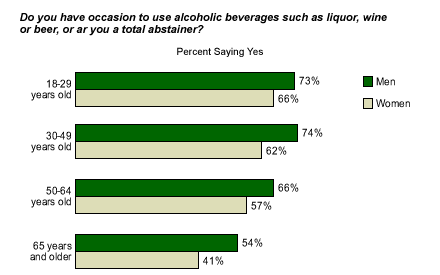

<AxesSubplot:xlabel='age', ylabel='Count'>

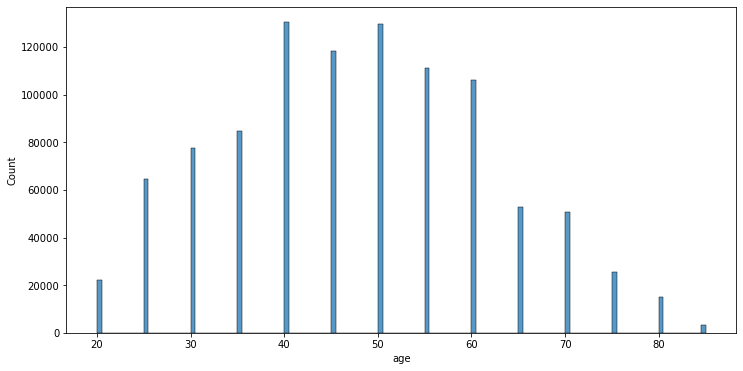

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(x = data['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

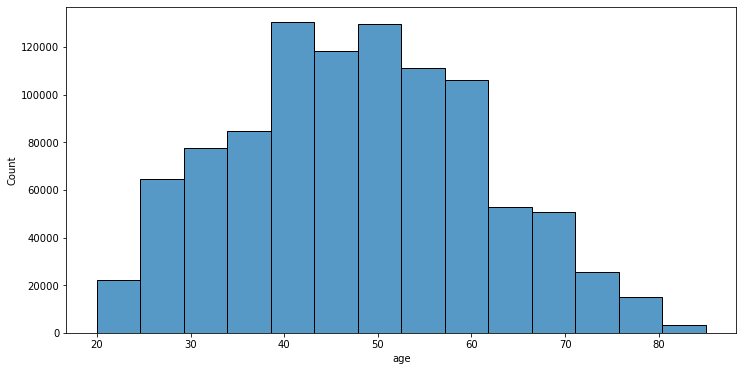

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(x = data['age'], bins=14)

<AxesSubplot:xlabel='age', ylabel='Count'>

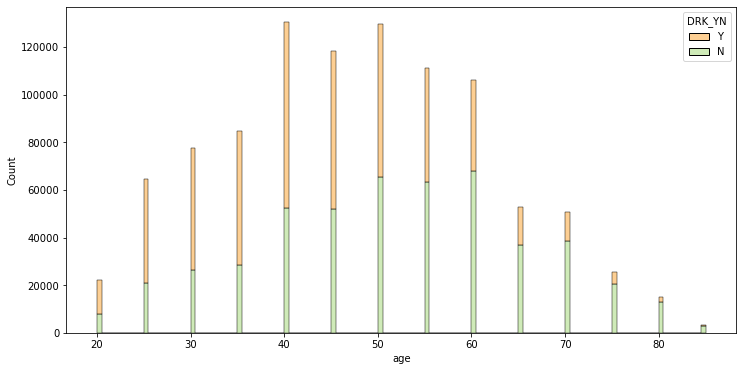

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='age',palette='Spectral',hue='DRK_YN',multiple='stack')

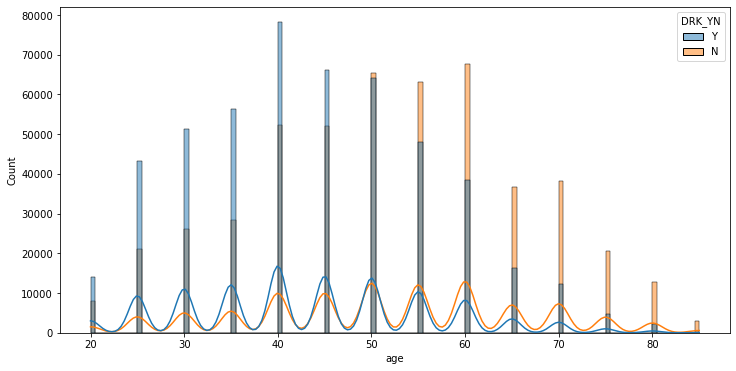

In [40]:

plt.figure(figsize=(12,6))
sns.histplot(data=data, x='age', hue='DRK_YN', kde=True)
plt.show()

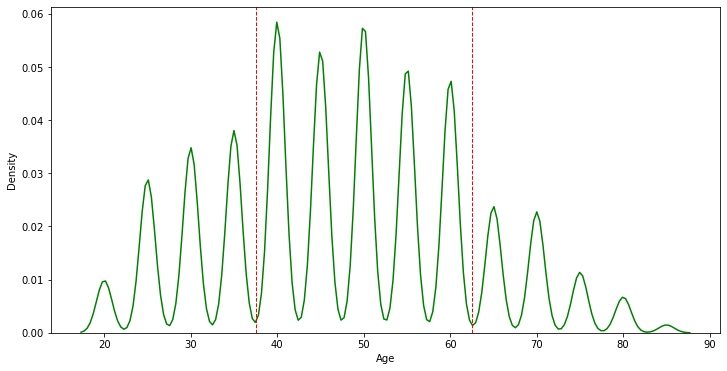

In [41]:
plt.figure(figsize=(12, 6))
plt.xlabel("Age")
plt.ylabel("Density")

# Plot KDE (Kernel Density Estimation)
sns.kdeplot(data.age, color='g') 

# Add vertical dashed lines at specific age values
plt.axvline(x=37.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
plt.axvline(x=62.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)

# Show the plot
plt.show()

<AxesSubplot:xlabel='weight', ylabel='Count'>

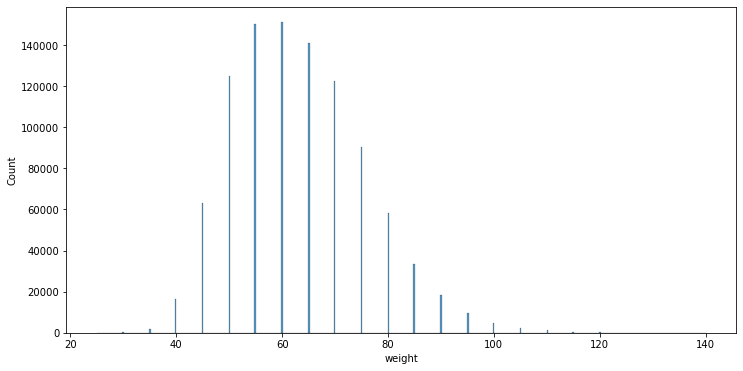

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(x = data['weight'])

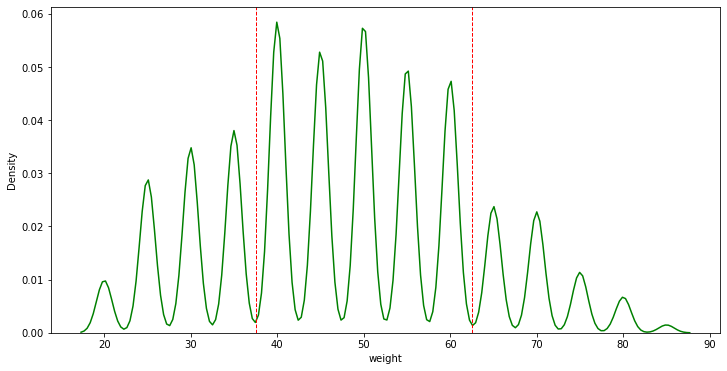

In [43]:
plt.figure(figsize=(12, 6))
plt.xlabel("weight")
plt.ylabel("Density")

# Plot KDE (Kernel Density Estimation)
sns.kdeplot(data.age, color='g') 

# Add vertical dashed lines at specific age values
plt.axvline(x=37.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
plt.axvline(x=62.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)

# Show the plot
plt.show()

<AxesSubplot:xlabel='height', ylabel='Count'>

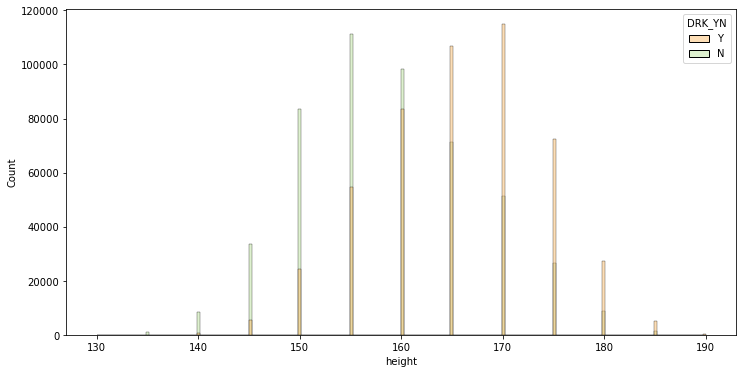

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='height',palette='Spectral',hue='DRK_YN')

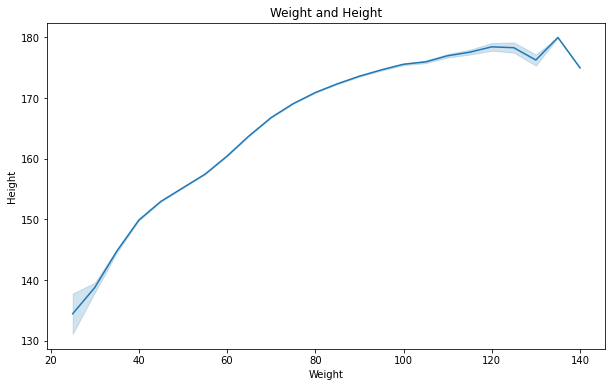

In [45]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='weight', y='height' )


# Customize the plot
plt.title("Weight and Height")
plt.xlabel("Weight")
plt.ylabel("Height")

# Show the plot
plt.show()

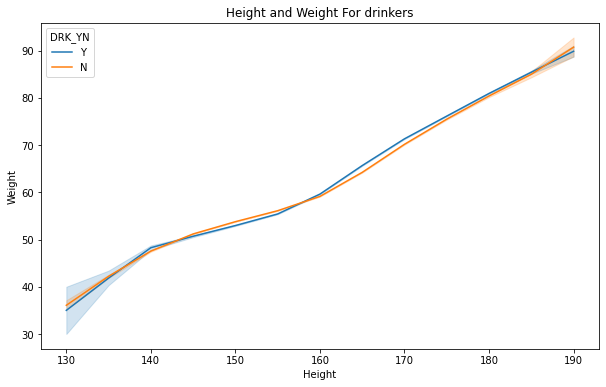

In [46]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='height', y='weight', hue='DRK_YN' )


# Customize the plot
plt.title("Height and Weight For drinkers")
plt.xlabel("Height")
plt.ylabel("Weight")

# Show the plot
plt.show()

# Why do men drink more than women on average?

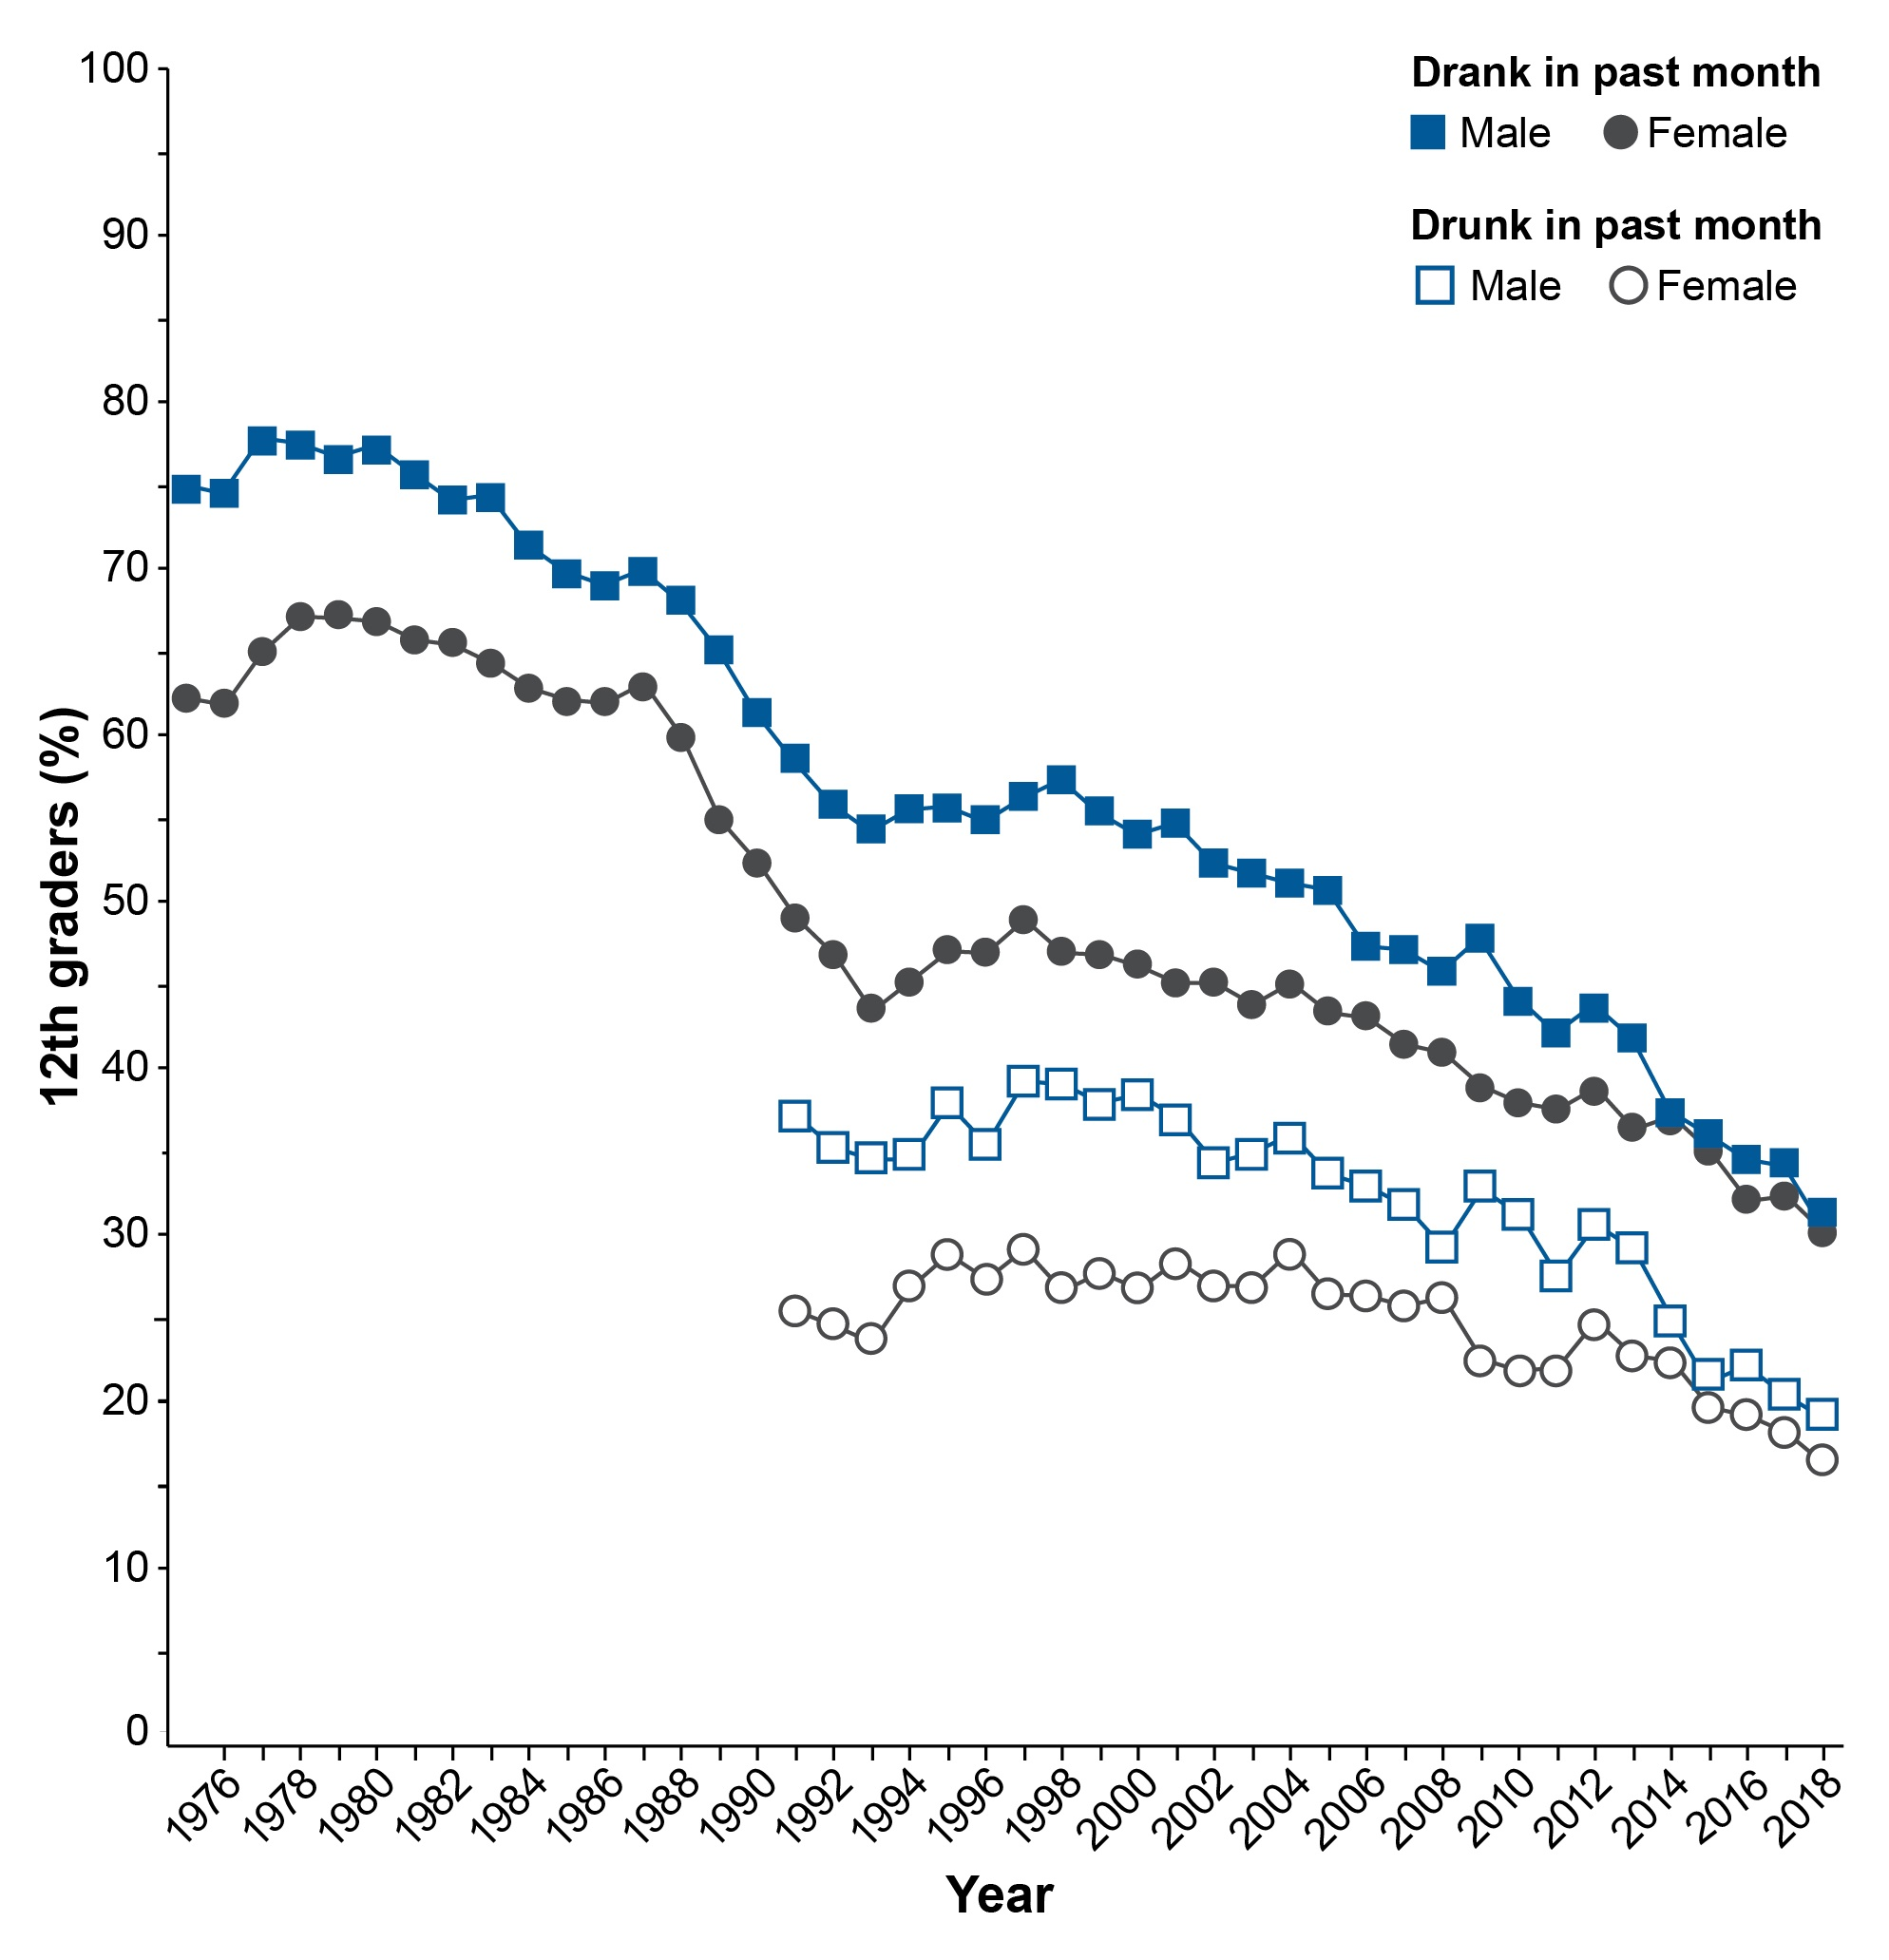

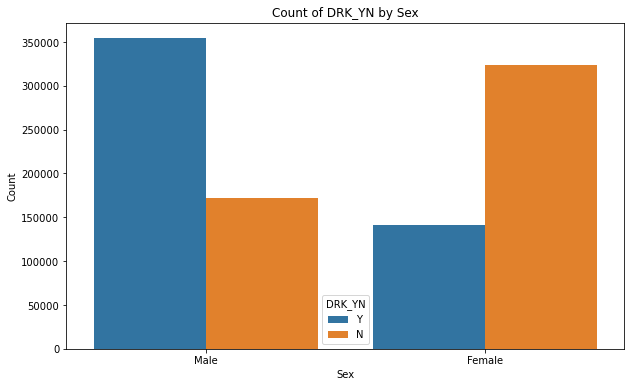

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sex', hue='DRK_YN')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of DRK_YN by Sex')

plt.show()

# Does drinking has any effect on a person's blood glucose?

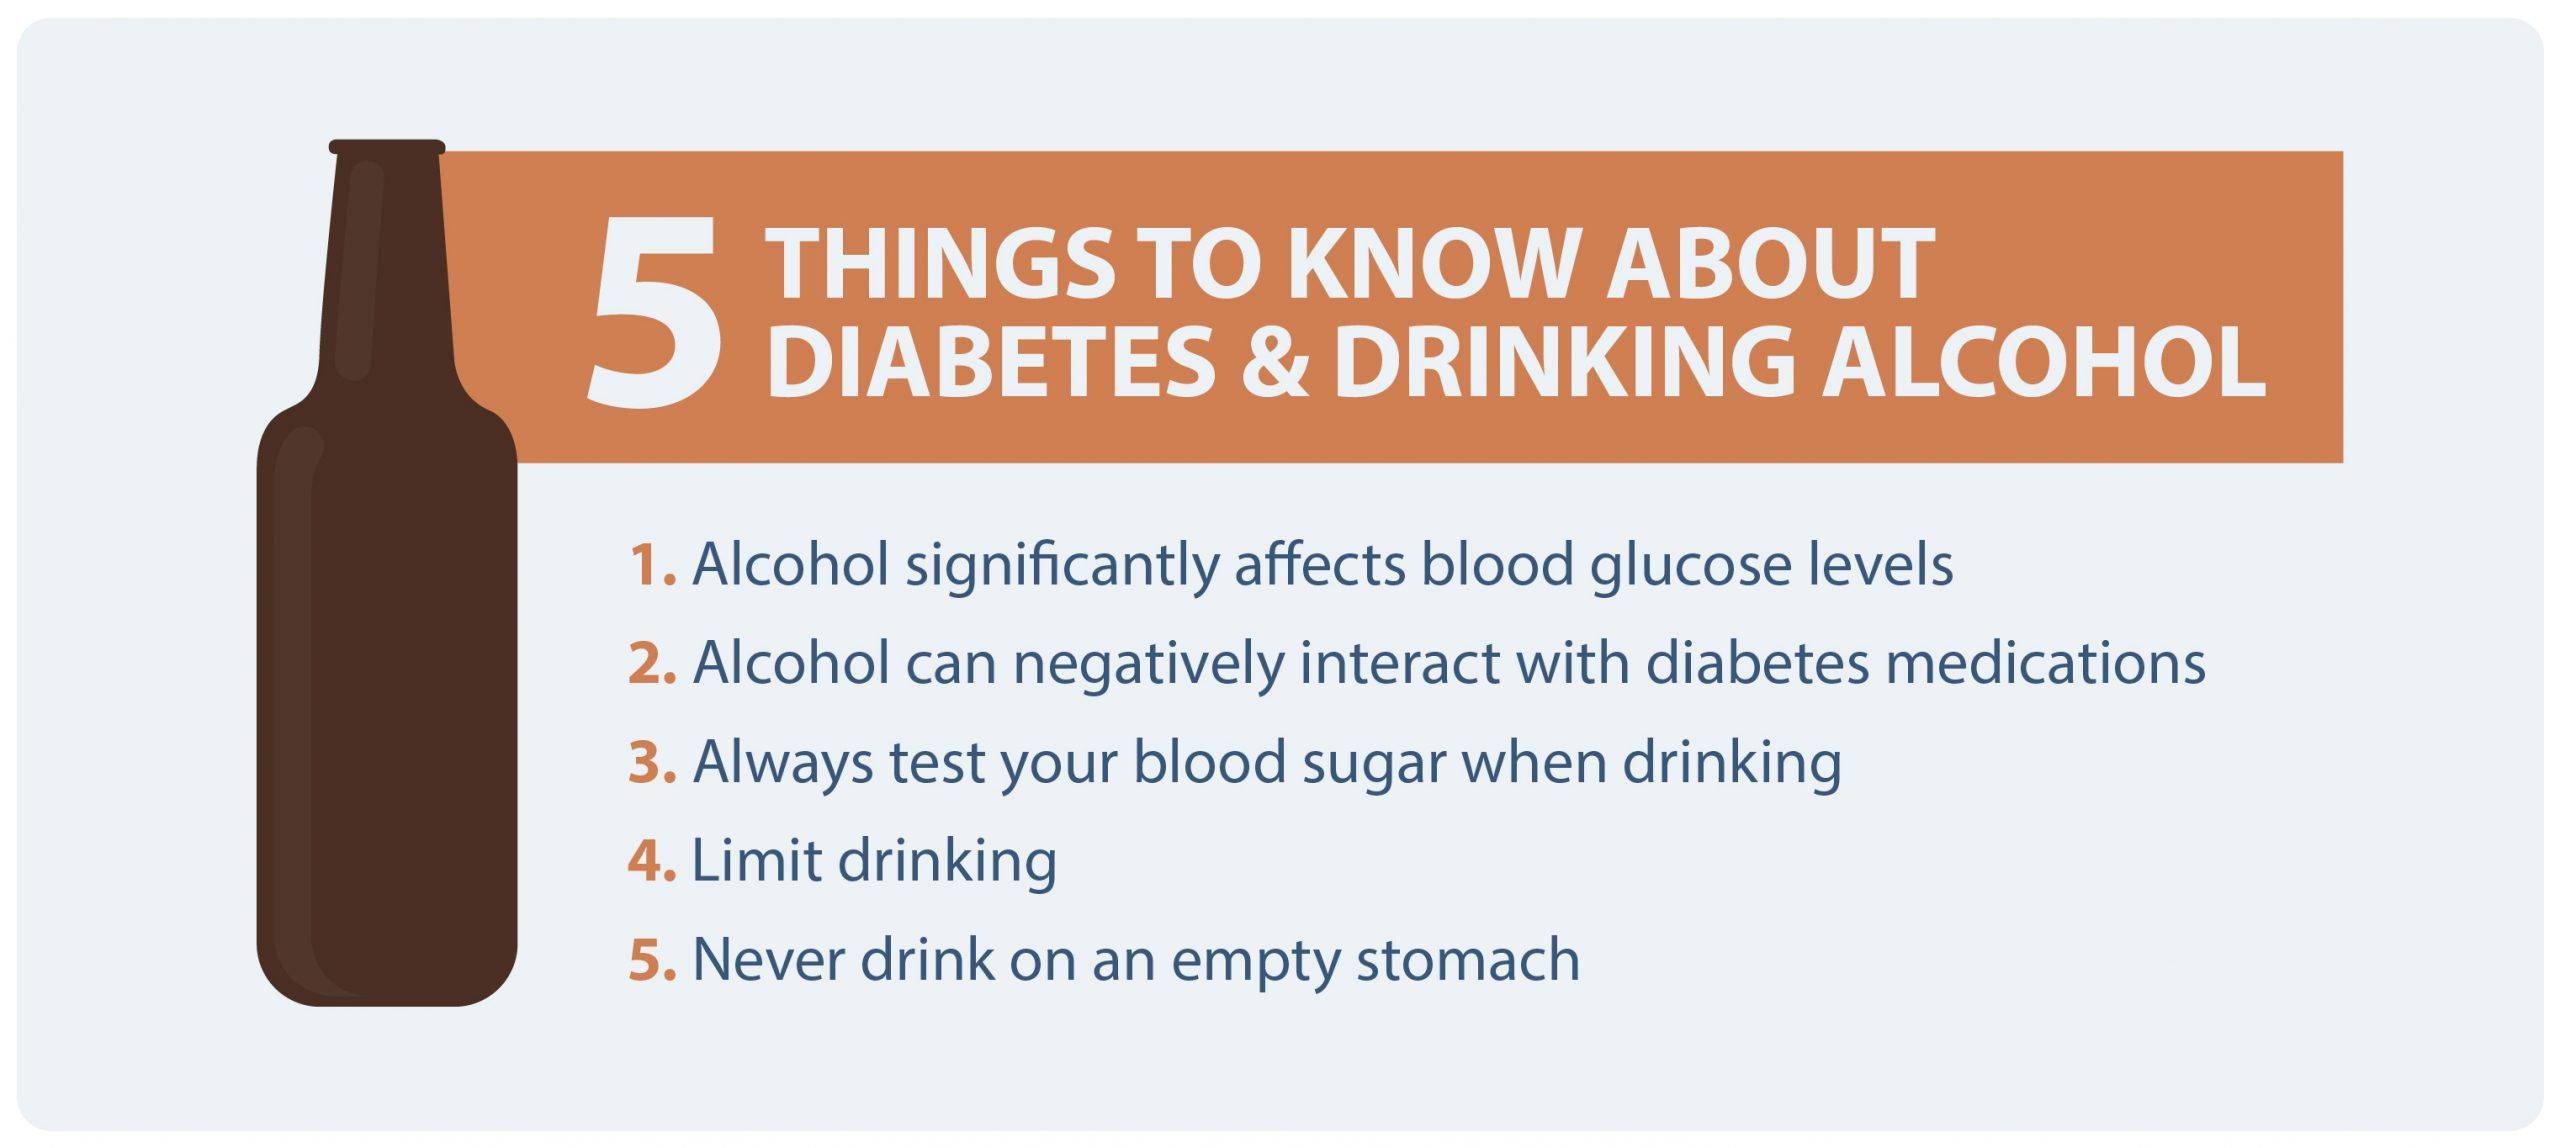

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='blood_glucose_class', hue='DRK_YN')

plt.xlabel('BLOOD GLUCOSE')
plt.ylabel('COUNT')
plt.title('COUNT OF DRK_YN BY BLOOD GLUCOSE')

plt.show()

# What about one's blood pressure? 

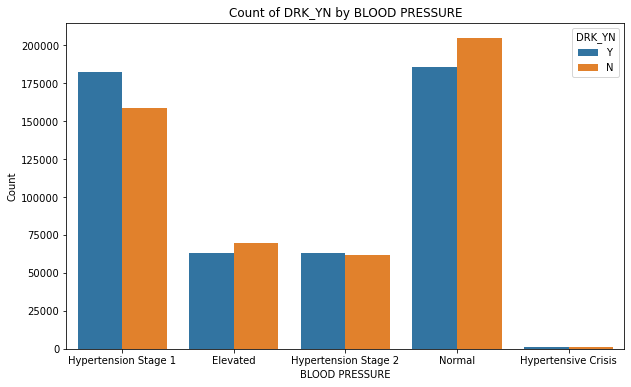

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='blood_pressure_class', hue='DRK_YN')

plt.xlabel('BLOOD PRESSURE')
plt.ylabel('Count')
plt.title('Count of DRK_YN by BLOOD PRESSURE')

plt.show()

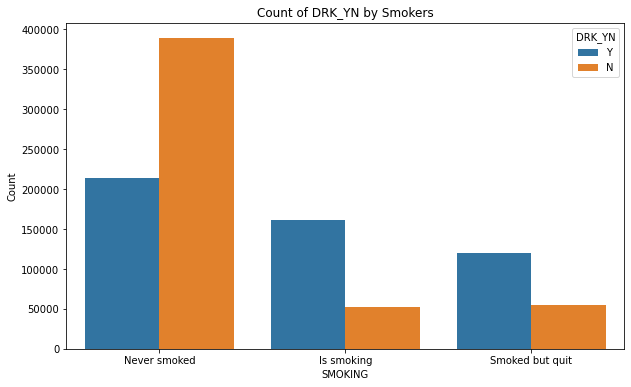

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Smoking_class', hue='DRK_YN')

plt.xlabel('SMOKING')
plt.ylabel('Count')
plt.title('Count of DRK_YN by Smokers')

plt.show()

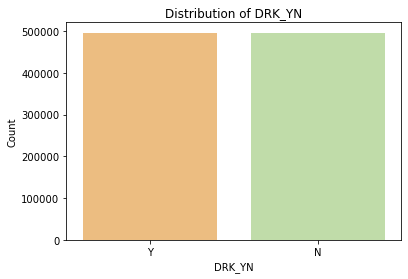

In [50]:
sns.countplot(data=data, x='DRK_YN', palette='Spectral')
plt.xlabel('DRK_YN')
plt.ylabel('Count')
plt.title('Distribution of DRK_YN')
plt.show()

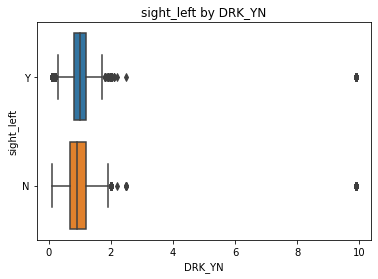

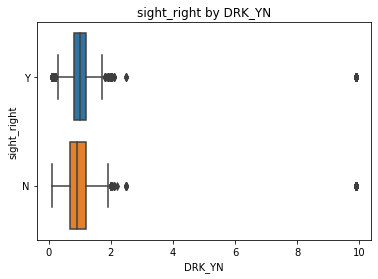

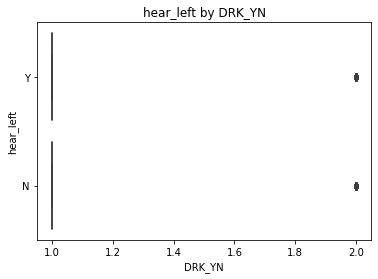

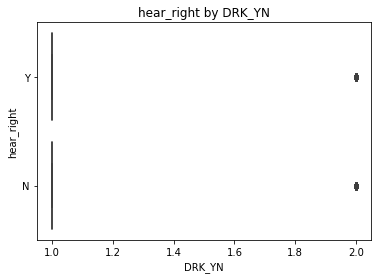

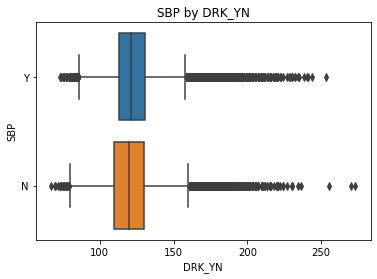

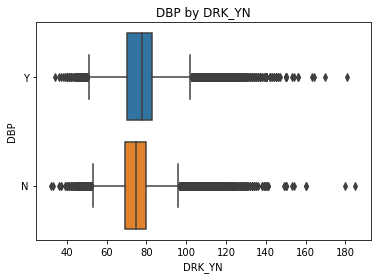

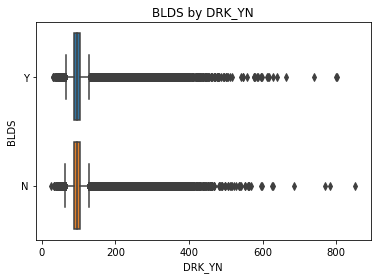

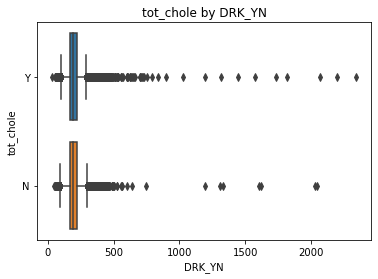

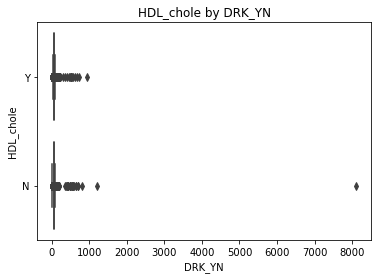

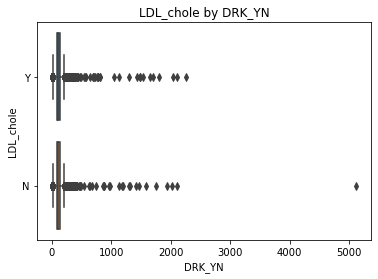

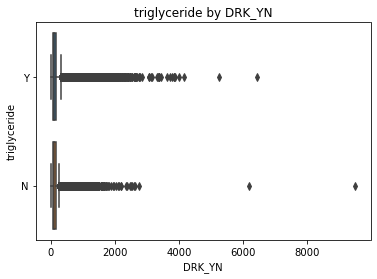

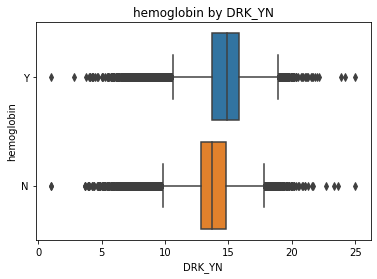

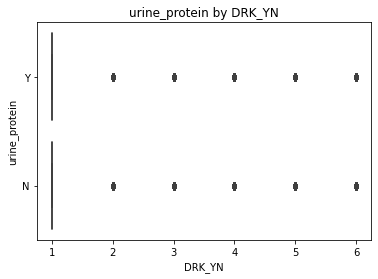

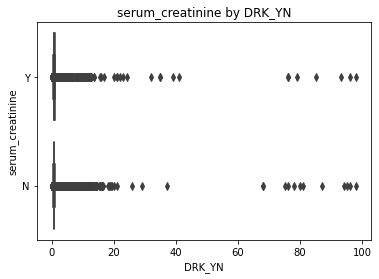

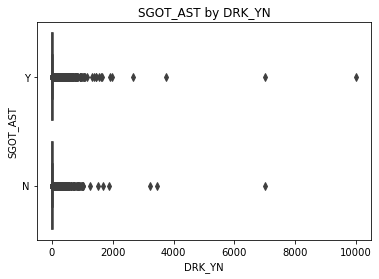

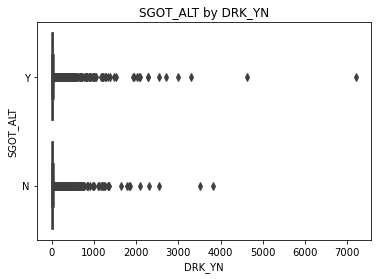

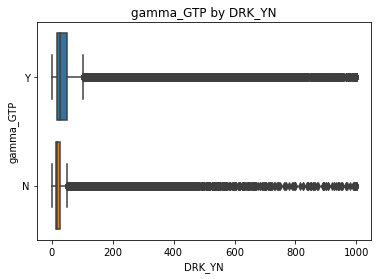

In [51]:
numeric_columns = ['sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
                   'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',  
                   'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

for column in numeric_columns:
    sns.boxplot(data=data, x=column, y='DRK_YN', orient="h")
    plt.xlabel('DRK_YN')
    plt.ylabel(column)
    plt.title(f'{column} by DRK_YN')
    plt.show()

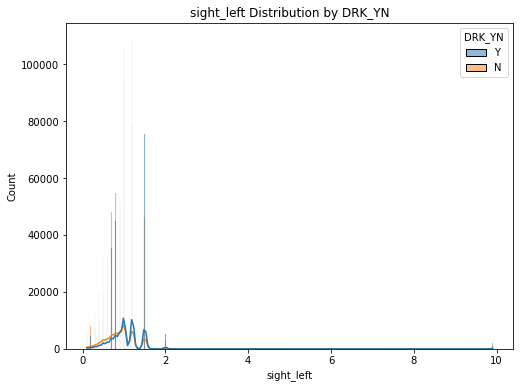

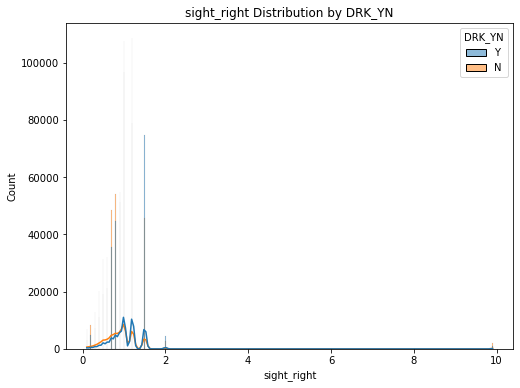

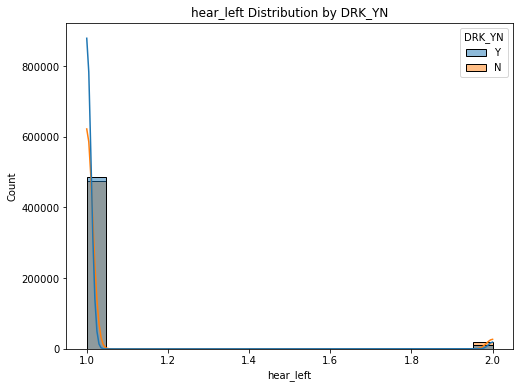

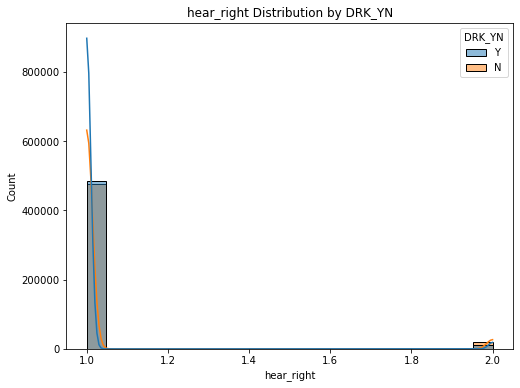

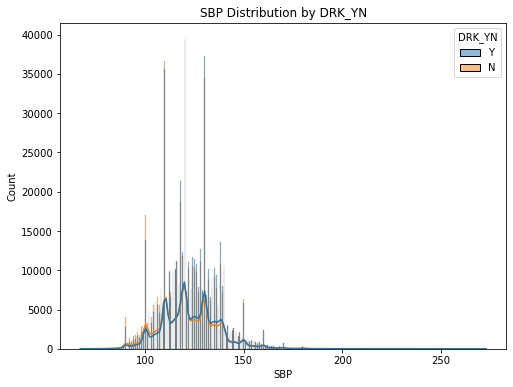

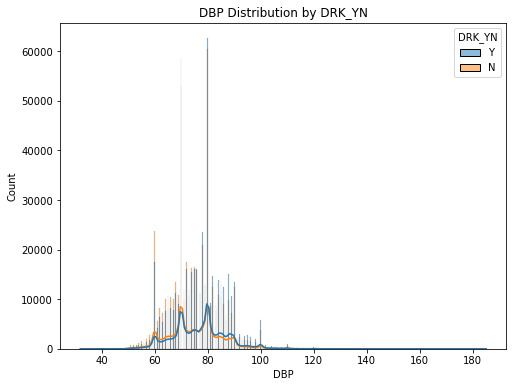

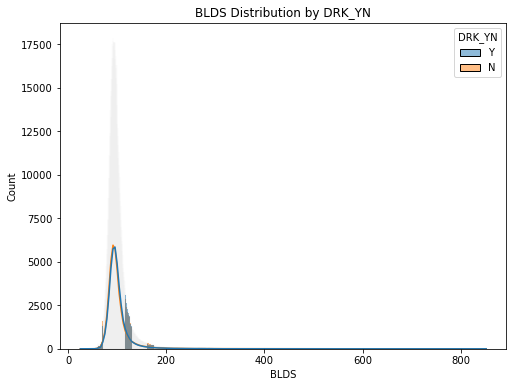

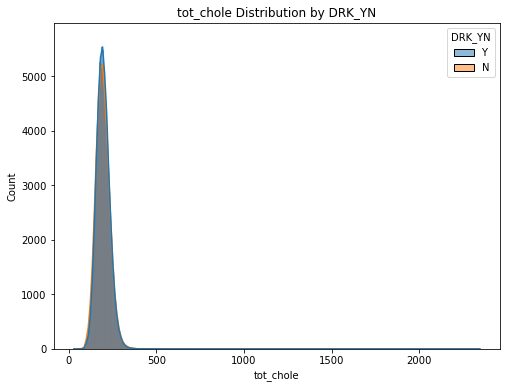

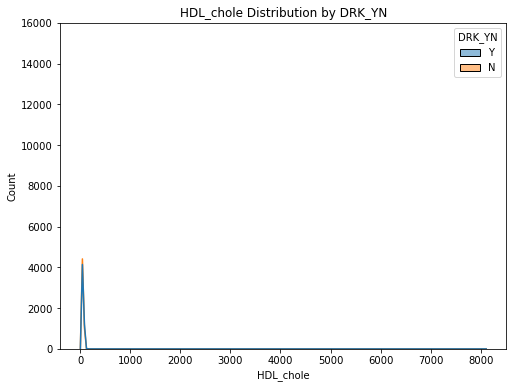

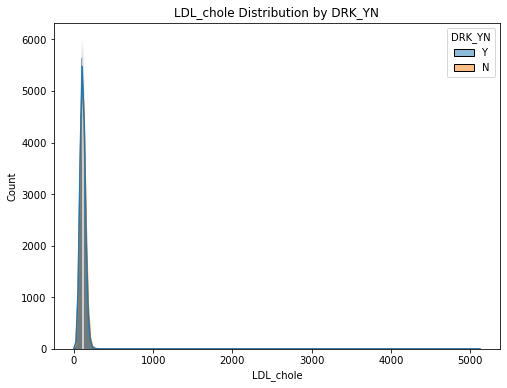

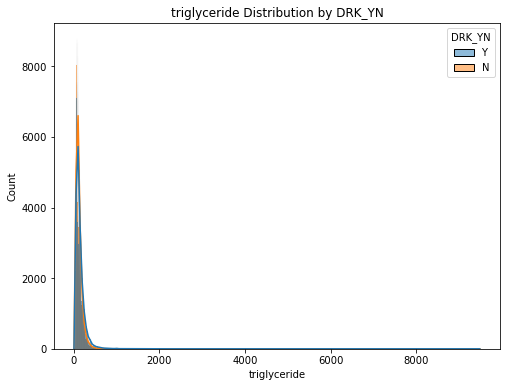

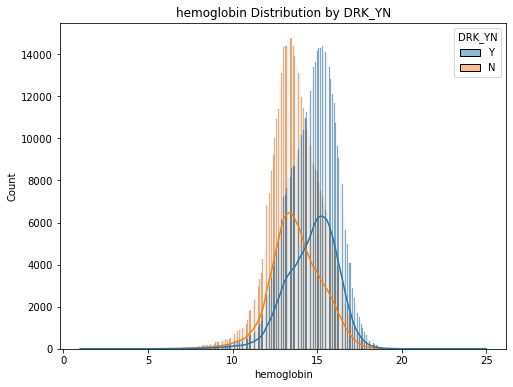

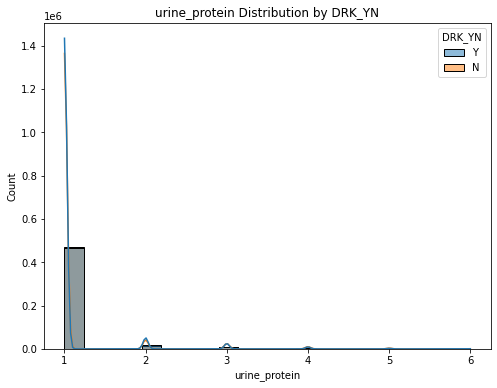

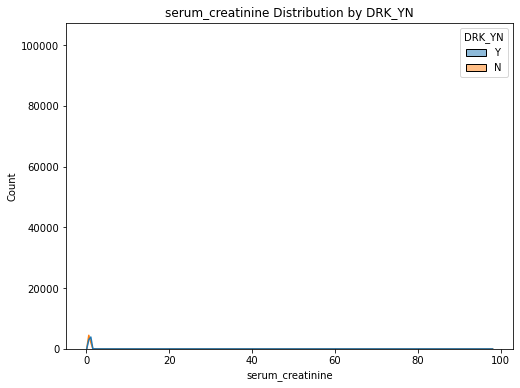

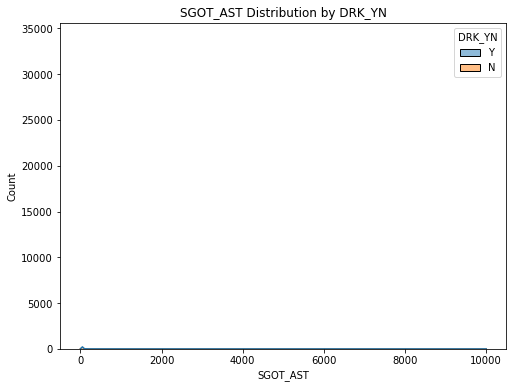

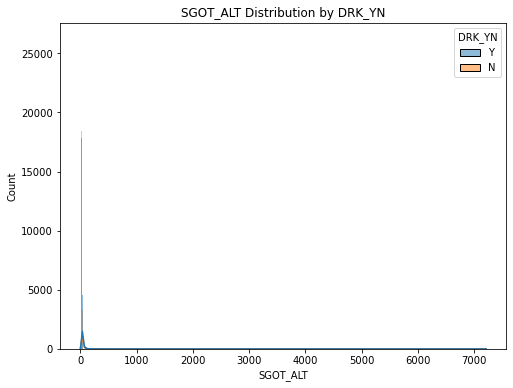

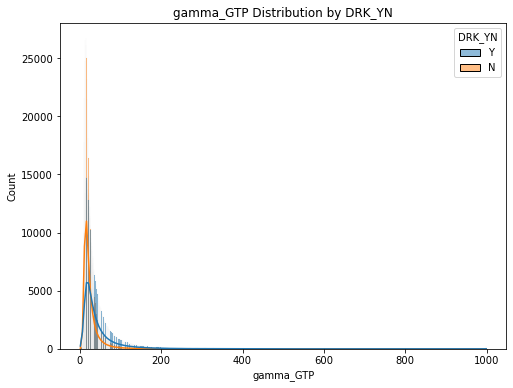

In [52]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, hue='DRK_YN', kde=True, common_norm=False)
    plt.xlabel(column)
    plt.title(f'{column} Distribution by DRK_YN')
    plt.show()

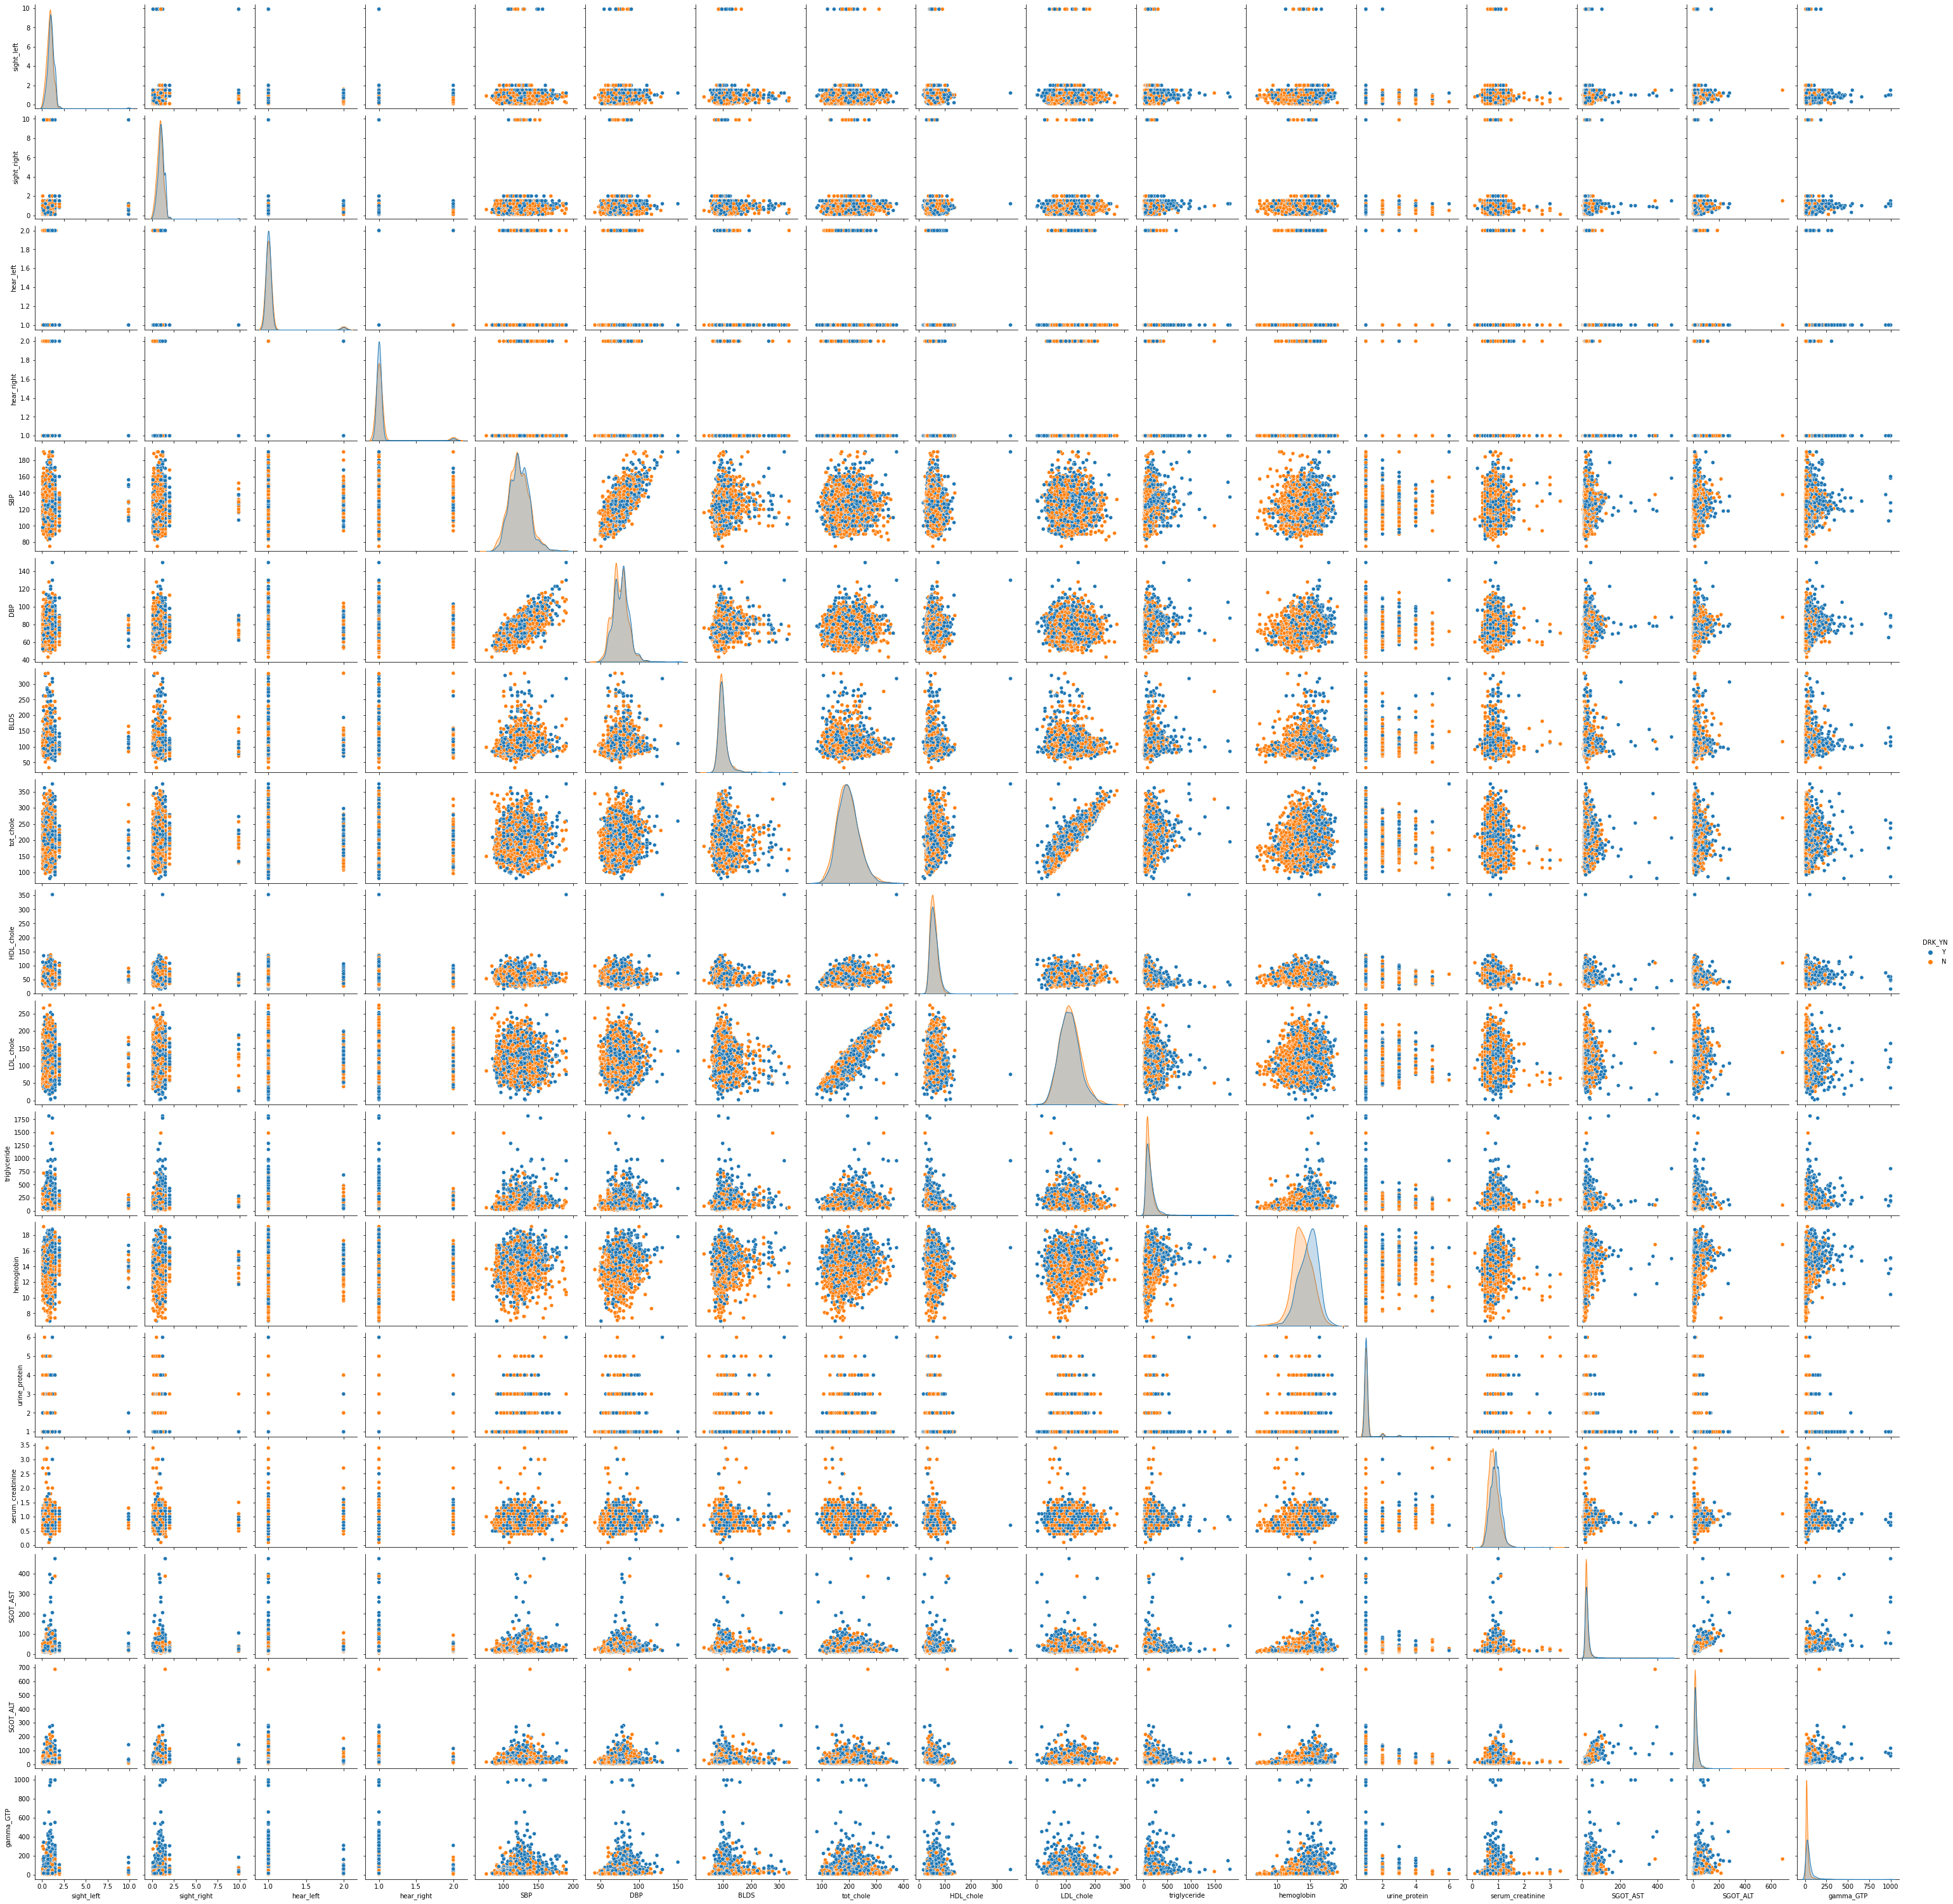

In [53]:
# Sample 10,000 rows from the original dataset
sample_size = 5000
sampled_data = data.sample(n=sample_size, random_state=42)  # You can adjust the random_state for reproducibility

# Create a pairplot with hue using the sampled data
sns.pairplot(data=sampled_data, hue='DRK_YN', vars=numeric_columns)
plt.show()

In [54]:
data

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right  SBP  DBP  BLDS  tot_chole  HDL_chole  \
0               1           1  120   80    99        193         48   
1               1           1  130   82   106        228         55   
2               1           1  120   70    98        136         41   
3               1           1  145   87    95        201         76   
4               1           1  138   82   101        199         61   
...           ...         ...  ...  ...   ...        ...        ...   
991341          1           1  114   80    88        198         46   
991342          1           1  119   83    83        133         40   
991343          1           1  110   70    90        205         96   
991344          1           1  119   74    69        122         38   
991345          1           1  133   79    99        225         39   

        LDL_chole  triglyceride  hemoglobin  urine_protein  serum_creatinine  \
0             126            92        17.1              1               1.0   
1             148           121        15.8              1               0.9   
2              74           104        15.8              1               0.9   
3             104           106        17.6              1               1.1   
4             117           104        13.8              1               0.8   
...           ...           ...         ...            ...               ...   
991341        125           132        15.0              1               1.0   
991342         84            45        15.8              1               1.1   
991343         77           157        14.3              1               0.8   
991344         73            53        14.5              1               0.8   
991345        153           163        15.8              1               0.9   

        SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd DRK_YN       bmi  \
0             21        35       40.0                 1      Y  0.002595   
1             20        36       27.0                 3      N  0.002469   
2             47        32       68.0                 1      N  0.002755   
3             29        34       18.0                 1      N  0.002612   
4             19        12       25.0                 1      N  0.002204   
...          ...       ...        ...               ...    ...       ...   
991341        26        36       27.0                 1      N  0.002612   
991342        14        17       15.0                 1      N  0.002595   
991343        30        27       17.0                 3      Y  0.002081   
991344        21        14       17.0                 1      N  0.001959   
991345        24        43       36.0                 3      Y  0.002734   

        BP_ratio  HDL_ratio  LDL_ratio sight_left_class sight_right_class  \
0       1.500000   0.248705   0.652850          Average           Average   
1       1.585366   0.241228   0.649123          Average              Good   
2       1.714286   0.301471   0.544118             Good              Good   
3       1.666667   0.378109   0.517413             Good              Good  

In [55]:
# List of columns to drop
columns_to_drop = ['Smoking_class', 'gamma_GTP_class', 'SGOT_ALT_class', 'SGOT_AST_class', 'serum_creatinine_class','blood_glucose_class', 'blood_pressure_class', 'sight_right_class', 'sight_left_class','LDL_ratio', 'HDL_ratio', 'HDL_ratio', 'BP_ratio', 'bmi']

# Use the drop method to remove the specified columns
data = data.drop(columns=columns_to_drop)

In [56]:
pd.set_option('display.max_columns', None)
data

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right  SBP  DBP  BLDS  tot_chole  HDL_chole  \
0               1           1  120   80    99        193         48   
1               1           1  130   82   106        228         55   
2               1           1  120   70    98        136         41   
3               1           1  145   87    95        201         76   
4               1           1  138   82   101        199         61   
...           ...         ...  ...  ...   ...        ...        ...   
991341          1           1  114   80    88        198         46   
991342          1           1  119   83    83        133         40   
991343          1           1  110   70    90        205         96   
991344          1           1  119   74    69        122         38   
991345          1           1  133   79    99        225         39   

        LDL_chole  triglyceride  hemoglobin  urine_protein  serum_creatinine  \
0             126            92        17.1              1               1.0   
1             148           121        15.8              1               0.9   
2              74           104        15.8              1               0.9   
3             104           106        17.6              1               1.1   
4             117           104        13.8              1               0.8   
...           ...           ...         ...            ...               ...   
991341        125           132        15.0              1               1.0   
991342         84            45        15.8              1               1.1   
991343         77           157        14.3              1               0.8   
991344         73            53        14.5              1               0.8   
991345        153           163        15.8              1               0.9   

        SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd DRK_YN  
0             21        35       40.0                 1      Y  
1             20        36       27.0                 3      N  
2             47        32       68.0                 1      N  
3             29        34       18.0                 1      N  
4             19        12       25.0                 1      N  
...          ...       ...        ...               ...    ...  
991341        26        36       27.0                 1      N  
991342        14        17       15.0                 1      N  
991343        30        27       17.0                 3      Y  
991344        21        14       17.0                 1      N  
991345        24        43       36.0                 3      Y  

[991320 rows x 24 columns]

In [57]:
data['DRK_YN'] = data['DRK_YN'].replace({"Y": 1, "N": 0})
data['DRK_YN'] = data['DRK_YN'].astype(int)
data['sex'] = data['sex'].replace({"Male": 1, "Female": 0})
data['sex'] = data['sex'].astype(int)

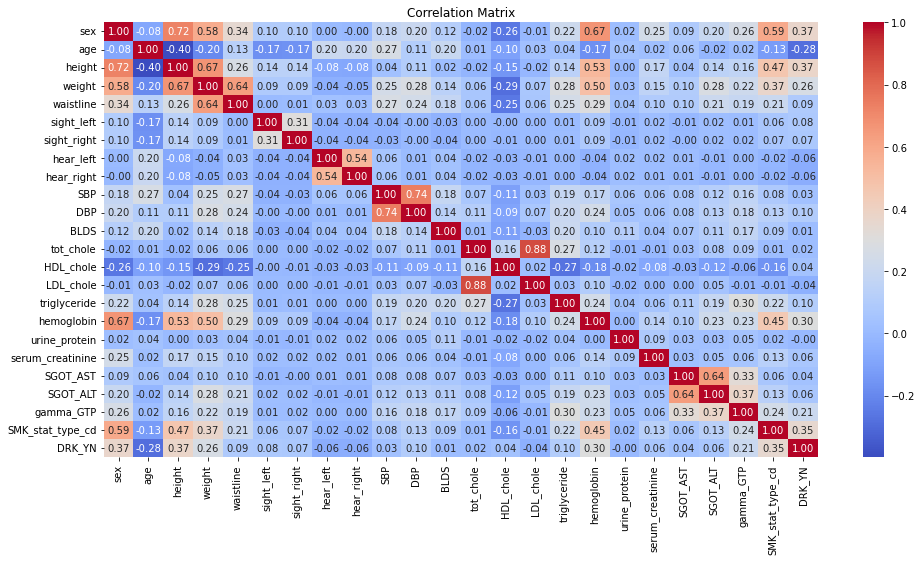

In [58]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [59]:


def remove_outliers(data, columns, k=1.5):
    """
    A function to remove outliers from the specified dataframe columns.

    Parameters:
    df (pandas.DataFrame): the original dataframe
    columns (list): list of columns to remove outliers for
    k (float): coefficient for calculating range boundaries
    """
    for column in columns:
        # Calculate the first and third quartiles
        q1 = data[column].quantile(0.15)
        q3 = data[column].quantile(0.85)

        # Calculate the interquartile range (IQR)
        iqr = q3 - q1

        # Define the upper and lower bounds to identify outliers
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr

        # Remove outliers by replacing them with NaN
        data[column] = data[column].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

    # Drop rows containing NaN values (outliers)
    data.dropna(inplace=True)

    return data


In [60]:
# List of columns to remove outliers from
columns_to_remove_outliers = ['waistline','SBP', 'DBP','BLDS','tot_chole','triglyceride','serum_creatinine','SGOT_AST', 'SGOT_ALT']

# Remove outliers
data = remove_outliers(data, columns_to_remove_outliers)


In [61]:
pd.set_option('display.max_columns', None)
data


sex  age  height  weight  waistline  sight_left  sight_right  \
0         1   35     170      75       90.0         1.0          1.0   
1         1   30     180      80       89.0         0.9          1.2   
2         1   40     165      75       91.0         1.2          1.5   
3         1   50     175      80       91.0         1.5          1.2   
4         1   50     165      60       80.0         1.0          1.2   
...     ...  ...     ...     ...        ...         ...          ...   
991341    1   45     175      80       92.1         1.5          1.5   
991342    1   35     170      75       86.0         1.0          1.5   
991343    0   40     155      50       68.0         1.0          0.7   
991344    1   25     175      60       72.0         1.5          1.0   
991345    1   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0               1           1  120.0  80.0   99.0      193.0         48   
1               1           1  130.0  82.0  106.0      228.0         55   
2               1           1  120.0  70.0   98.0      136.0         41   
3               1           1  145.0  87.0   95.0      201.0         76   
4               1           1  138.0  82.0  101.0      199.0         61   
...           ...         ...    ...   ...    ...        ...        ...   
991341          1           1  114.0  80.0   88.0      198.0         46   
991342          1           1  119.0  83.0   83.0      133.0         40   
991343          1           1  110.0  70.0   90.0      205.0         96   
991344          1           1  119.0  74.0   69.0      122.0         38   
991345          1           1  133.0  79.0   99.0      225.0         39   

        LDL_chole  triglyceride  hemoglobin  urine_protein  serum_creatinine  \
0             126          92.0        17.1              1               1.0   
1             148         121.0        15.8              1               0.9   
2              74         104.0        15.8              1               0.9   
3             104         106.0        17.6              1               1.1   
4             117         104.0        13.8              1               0.8   
...           ...           ...         ...            ...               ...   
991341        125         132.0        15.0              1               1.0   
991342         84          45.0        15.8              1               1.1   
991343         77         157.0        14.3              1               0.8   
991344         73          53.0        14.5              1               0.8   
991345        153         163.0        15.8              1               0.9   

        SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0           21.0      35.0       40.0                 1       1  
1           20.0      36.0       27.0                 3       0  
2           47.0      32.0       68.0                 1       0  
3           29.0      34.0       18.0                 1       0  
4           19.0      12.0       25.0                 1       0  
...          ...       ...        ...               ...     ...  
991341      26.0      36.0       27.0                 1       0  
991342      14.0      17.0       15.0                 1       0  
991343      30.0      27.0       17.0                 3       1  
991344      21.0      14.0       17.0                 1       0  
991345      24.0      43.0       36.0                 3       1  

[907035 rows x 24 columns]

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907035 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               907035 non-null  int32  
 1   age               907035 non-null  int64  
 2   height            907035 non-null  int64  
 3   weight            907035 non-null  int64  
 4   waistline         907035 non-null  float64
 5   sight_left        907035 non-null  float64
 6   sight_right       907035 non-null  float64
 7   hear_left         907035 non-null  int32  
 8   hear_right        907035 non-null  int32  
 9   SBP               907035 non-null  float64
 10  DBP               907035 non-null  float64
 11  BLDS              907035 non-null  float64
 12  tot_chole         907035 non-null  float64
 13  HDL_chole         907035 non-null  int32  
 14  LDL_chole         907035 non-null  int32  
 15  triglyceride      907035 non-null  float64
 16  hemoglobin        90

In [63]:
# CHECKING THE MEAN OF THE TARGET VARIABLE
data.groupby('DRK_YN').mean()

sex        age      height     weight  waistline  sight_left  \
DRK_YN                                                                      
0       0.334036  51.450722  158.645521  59.484958  79.544776    0.935584   
1       0.695233  43.316518  165.527486  65.864287  81.693789    1.029384   

        sight_right  hear_left  hear_right         SBP        DBP       BLDS  \
DRK_YN                                                                         
0          0.935030    1.04076    1.039659  121.403646  74.773642  96.612547   
1          1.025253    1.02079    1.019861  122.149540  76.551918  97.254172   

         tot_chole  HDL_chole   LDL_chole  triglyceride  hemoglobin  \
DRK_YN                                                                
0       194.521769  56.718132  114.762311    114.796712   13.716318   
1       195.021561  58.441463  111.471446    126.178576   14.635595   

        urine_protein  serum_creatinine   SGOT_AST   SGOT_ALT  gamma_GTP  \
DRK_YN                                                                     
0            1.079825          0.813185  23.451706  21.570224  24.450228   
1            1.078893          0.880945  24.206711  23.668407  40.166169   

        SMK_stat_type_cd  
DRK_YN                    
0               1.307297  
1               1.862846

In [64]:
# SEPARATING THE FEASTURES AND TARGET
x = data.drop(columns='DRK_YN', axis=1)
y =data['DRK_YN']

In [65]:
# PRINTING THE VALUE OF X ----------VARIABLE
print(x)

        sex  age  height  weight  waistline  sight_left  sight_right  \
0         1   35     170      75       90.0         1.0          1.0   
1         1   30     180      80       89.0         0.9          1.2   
2         1   40     165      75       91.0         1.2          1.5   
3         1   50     175      80       91.0         1.5          1.2   
4         1   50     165      60       80.0         1.0          1.2   
...     ...  ...     ...     ...        ...         ...          ...   
991341    1   45     175      80       92.1         1.5          1.5   
991342    1   35     170      75       86.0         1.0          1.5   
991343    0   40     155      50       68.0         1.0          0.7   
991344    1   25     175      60       72.0         1.5          1.0   
991345    1   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0               1           1  120.0  80.0   99.0      193.0

In [66]:
# PRINTING THE VALUE OF Y ----------TARGET
print(y)

0         1
1         0
2         0
3         0
4         0
         ..
991341    0
991342    0
991343    1
991344    0
991345    1
Name: DRK_YN, Length: 907035, dtype: int32


In [67]:
# SPLITING THE DATA INTO TRAINING AND TESTING DATA
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=82)

In [68]:
# CHECKING HOW MANY DATA POINTS ARE THERE IN THE x  train and test

print(x.shape,x_train.shape, x_test.shape )

(907035, 23) (725628, 23) (181407, 23)


In [69]:
 #CHECKING HOW MANY DATA POINTS ARE THERE IN THE y  train and test

print(y.shape,y_train.shape, y_test.shape )

(907035,) (725628,) (181407,)


In [70]:
# USING LOGISTIC REGRESSION
model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [71]:
#TRAINING THE LOGISTIC REGRESSION MODEL USING THE TRAINING DATA
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [72]:
#Accuracy score

# ACCURACY ON THE TRAINING DATA
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print(" THE ACCURACY SCORE FOR THE TRAIN DATA IS: ",training_data_accuracy )

 THE ACCURACY SCORE FOR THE TRAIN DATA IS:  0.7257864911497351


In [73]:
# ACCURACY ON THE TEST DATA
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print(" THE ACCURACY SCORE FOR THE Test DATA IS: ",test_data_accuracy )

 THE ACCURACY SCORE FOR THE Test DATA IS:  0.7245365393838165


In [74]:
input_data = (1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,)
# changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshaping the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1, -2)

prediction =model.predict(input_data_reshaped)
 #printing the prediction
print(prediction)

if(prediction[0]==0):
    print('The person is likely drinker')

else:
    print('This person is likely not a drinker')

[1]
This person is likely not a drinker


C:\Users\Mimi Aminu D\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
